#### **See overview of the problem in https://github.com/jroccal/feature_engineering/blob/main/amex-fe1-overview-s-feature-analysis.ipynb**

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amex-default-prediction/sample_submission.csv
/kaggle/input/amex-default-prediction/train_data.csv
/kaggle/input/amex-default-prediction/test_data.csv
/kaggle/input/amex-default-prediction/train_labels.csv
/kaggle/input/amex-data-integer-dtypes-parquet-format/train.parquet
/kaggle/input/amex-data-integer-dtypes-parquet-format/test.parquet


In [5]:
import gc
import seaborn as sns
from pathlib import Path

path_amex_csv = Path('/kaggle/input/amex-default-prediction/')
path_amex_parquet = Path('/kaggle/input/amex-data-integer-dtypes-parquet-format/')

In [6]:
%%time
df_labels_train = pd.read_csv(path_amex_csv / 'train_labels.csv', index_col='customer_ID')

CPU times: user 665 ms, sys: 132 ms, total: 798 ms
Wall time: 1.15 s


In [7]:
%%time
df_data_train_parquet = pd.read_parquet(path_amex_parquet / 'train.parquet')


CPU times: user 10.6 s, sys: 14.5 s, total: 25.1 s
Wall time: 21.5 s


In [8]:
print(df_data_train_parquet.shape)
print(df_labels_train.shape)
categorical_features = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

(5531451, 190)
(458913, 1)


# 1. Check samples and date

In [9]:
df_custID_date = df_data_train_parquet[['customer_ID', 'S_2']]
print(df_custID_date.shape)
gc.collect()

(5531451, 2)


46

In [10]:
# Analyzing the dates
df_max_date = df_custID_date.groupby('customer_ID').max()
df_min_date = df_custID_date.groupby('customer_ID').min()
df_diff_date = (pd.to_datetime(df_max_date['S_2']) - pd.to_datetime(df_min_date['S_2'])).map(lambda x: x.days)
display(df_diff_date.sort_values().iloc[0:10])
display(df_diff_date.sort_values().iloc[-10:])
print('mounthly records for customers with 0 and 1 labels ', 395/30)
gc.collect()

customer_ID
3aa011de85a1a4ab4f0687190f181439a7f7bff8d08887972e9c72633cdd72e7    0
908c1f0eb1c27bb6ef7f261139b61bcb157fe3bb08f66c58b64aa3b9859e4899    0
e2030098efd217b4ca24bb5b31abf09788fbbdb6c45eaedd991d3df950d7efd1    0
ba7f2bee48893f4ad2f9b52967c8ab5b7f25c4119f095e8f3f9072200c8a3808    0
63fa1dae6ae716a7a5d1455b284681588b161cd35a03e73c6219bba5cd1c2fb5    0
37007a88976b00c3b58ec5dd4984e8f25858db945b277c80660fe60e7aa0aa18    0
722bc5f514bf3aed79a2f8f33fbeae1fc9316b458e30771f884bcd72036e0163    0
3b7149c497417ce353701aa7c5a58189b5b1e791e9eb398b7c8460c97098e93d    0
bd1b21a5da2f59814a24ac05f907b4130fa6a5223756c6ed217eb707851da654    0
bd1b37408014dc66559401efffa30318e0d9d886bf412127fb81741fca9f10ba    0
Name: S_2, dtype: int64

customer_ID
2f4def50b25fc4b40f47e3f2760e30a6e957c24a0414f832420a84242b0aad2c    395
16f8cf9065d8cf81f3a7ee6b4b326cf505a3fae4c8e56bb3f7abfc9a2f509834    395
92cef0a74b98874a77902f6288f9b8ed8a5131634581d0f93518b42207a73f7f    395
25ada08859775be120ce91d373c241862c778191a22175d2bcedf4d903291652    395
0438c17fd238859f6660ece597d69fd197b3e1a9763f96571bfd169e0d58bdc6    395
b6f4356177f134dc89792ea75277a87977b311a1df195254acc05bbb152803e3    395
1d3f6960593d9f3f73d13aac534e0d21d59aa0b1ccabdabe94dbcff84a18d92e    395
af517228480a925e23663ee0c8b670236349ff386e1a8c8c4dbc90080aca04b3    395
4bed06698e81be59ed794b5838133c9d370af278badfb026d55d7c2a9ad84c68    395
a60b33131e236d9522a21b7af82afe0cefb9f049aa6e4fe006f7f071c5d73e80    395
Name: S_2, dtype: int64

mounthly records for customers with 0 and 1 labels  13.166666666666666


0

Text(0.5, 1.0, 'Numero of days for each customer')

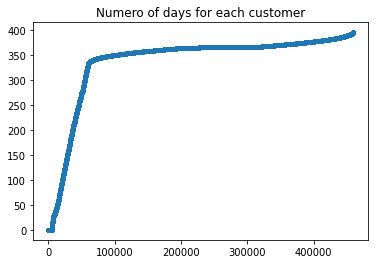

In [11]:
ax = df_diff_date.sort_values().reset_index()['S_2'].plot(style='.')
ax.set_title('Numero of days for each customer')

In [12]:
df_custID_date.set_index('customer_ID', inplace=True)
print(df_custID_date.loc['3aa011de85a1a4ab4f0687190f181439a7f7bff8d08887972e9c72633cdd72e7']) #1 day 
print()
print(df_custID_date.loc['2f4def50b25fc4b40f47e3f2760e30a6e957c24a0414f832420a84242b0aad2c']) #395 days
df_samples_by_id = df_custID_date.groupby(level=0).count()
df_samples_by_id.columns = ['Num_Dates']
display(df_samples_by_id.sort_values('Num_Dates').iloc[0:10,])
display(df_samples_by_id.sort_values('Num_Dates').iloc[-10:,])
gc.collect()

S_2    2018-03-31
Name: 3aa011de85a1a4ab4f0687190f181439a7f7bff8d08887972e9c72633cdd72e7, dtype: object

                                                           S_2
customer_ID                                                   
2f4def50b25fc4b40f47e3f2760e30a6e957c24a0414f83...  2017-03-01
2f4def50b25fc4b40f47e3f2760e30a6e957c24a0414f83...  2017-04-14
2f4def50b25fc4b40f47e3f2760e30a6e957c24a0414f83...  2017-05-01
2f4def50b25fc4b40f47e3f2760e30a6e957c24a0414f83...  2017-06-29
2f4def50b25fc4b40f47e3f2760e30a6e957c24a0414f83...  2017-07-24
2f4def50b25fc4b40f47e3f2760e30a6e957c24a0414f83...  2017-08-31
2f4def50b25fc4b40f47e3f2760e30a6e957c24a0414f83...  2017-09-14
2f4def50b25fc4b40f47e3f2760e30a6e957c24a0414f83...  2017-10-11
2f4def50b25fc4b40f47e3f2760e30a6e957c24a0414f83...  2017-11-24
2f4def50b25fc4b40f47e3f2760e30a6e957c24a0414f83...  2017-12-14
2f4def50b25fc4b40f47e3f2760e30a6e957c24a0414f83...  2018-01-02
2f4def50b25fc4b40f47e3f2760e30a6e957c24a0414f83...  2018-02-16
2f4def50b25fc

,Num_Dates
customer_ID,
268ba31cb8ca378b7355e45ee2d476c8f245f5d7f7c5ac8d2220da790692354d,1
398b2284afa95bcb5e45b9d0a12b3b9489417c7e85e3d4201949126dea87dfb2,1
f6a5f41c78d34e3283f4a5f1ab5dd84195783af511fc3a2b450e459a1eca6371,1
914821e33ef409f4f2c3b1e82c21d69bf18d5c7f8a3bd470e8f32eade782440c,1
d7eac493c711f26e608cc619384fc0eb6df04859da94bb5bfde386b75eb4c14f,1
be7a4f53b7f695c08c1364ef8b981f0bbea32bdfa7cddcf7738a78096d8e3a05,1
353ba249166e0506a004fd474275f8c3d68b9670a786f07a61c58d866895a2e3,1
a1c70f57d0ae651ac7e0253523ec43998d3950201235d22554e79f2c2f24334d,1
270048c153b02328383135b66e6f0ec336087a0f367348d70d00057fd515c4e8,1


,Num_Dates
customer_ID,
5c6b5ae2c487197e8cbc2d7663dc84878bd09c7fdb9699c0492a3cd64f352cef,13
5c6b3fc73f9c3481648a9b9750c3785c3218a0c67fd630e710641ad402d13c9f,13
5c6aef8aac83c5114abd735449d6270d8c9c4db4af3fa56ef3226ce9cffee4ff,13
5c6aacbaefc8818b2d3604bad2cc449ac3b289b1f524f731d5e1228b675b900c,13
5c6a594f885690556b6f77946f996bc03b9ed62623f7499f06991df8af1b5b20,13
5c6a469918b7badb212b6f33feb344096202679a44473295c4cb54a295801d35,13
5c6a423106d22db96000f5c02dde5de937b18ea1d653ccdf19bba6777a54aafb,13
5c6a3483b4bb775550043ae126163ec1d9216dececfcaf20502e1a4599c333b8,13
5c6bded8a6ba8c94ad66e6210d58d5008813c5192b740e1ef0d0476151d02ca5,13


0

In [13]:
df_customers_by_sample  = df_samples_by_id.reset_index().groupby('Num_Dates').count()
df_customers_by_sample

,customer_ID
Num_Dates,
1,5120
2,6098
3,5778
4,4673
5,4671
6,5515
7,5198
8,6110
9,6411


# 2. Check features

In [14]:
import matplotlib.pyplot as plt
color = sns.color_palette()

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import warnings
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

In [15]:
def get_features(all_features):
    dict_feat = {'P':[], 'S':[], 'D':[], 'B':[], 'R':[]}
    for feat in all_features:
        name, _ = feat.split('_')
        if name in dict_feat:
            dict_feat[name].append(feat)
    return dict_feat

all_features = df_data_train_parquet.columns
dict_features = get_features(list(all_features))
print('P-payment', len(dict_features['P']))
print('S-spend', len(dict_features['S']))
print('D-delinquency', len(dict_features['D']))
print('B-balance', len(dict_features['B']))
print('R-risk', len(dict_features['R']))

P-payment 3
S-spend 22
D-delinquency 96
B-balance 40
R-risk 28


In [16]:
data = df_data_train_parquet[['customer_ID']+dict_features['D']]
data.set_index('customer_ID', inplace=True)

data = df_samples_by_id.join(data, how='inner') #join the num_samples by id
data = df_labels_train.join(data, how='inner') #join the labels
print(data.shape)
display(data.iloc[0:3])
gc.collect()
gc.collect()

(5531451, 98)


,target,Num_Dates,D_39,D_41,D_42,D_43,D_44,D_45,D_46,D_47,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0,13,0,0.0,NaN,NaN,0,0.708906,0.358587,0.525351,...,-1,-1,-1,0,0,0.0,NaN,0,0.000610,0
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0,13,0,0.0,NaN,NaN,0,0.712795,0.353630,0.521311,...,-1,-1,-1,0,0,0.0,NaN,0,0.005492,0
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0,13,3,0.0,NaN,NaN,0,0.720884,0.334650,0.524568,...,-1,-1,-1,0,0,0.0,NaN,0,0.006986,0


0

In [17]:
data = data[data['Num_Dates'] == 13]
data.shape

(5018442, 98)

In [18]:
# check the number of samples: number_customers*number_samples(13)
if df_customers_by_sample.loc[13].values[0]*13 == data.shape[0]:
    print(True)

print("The group of customers with 13 samples are:",df_customers_by_sample.loc[13].values[0], ' with 13 samples is a total:', 
      df_customers_by_sample.loc[13].values[0]*13,'\n', 'which represent ',(df_customers_by_sample.loc[13].values[0]*13)/5531451, 
      '% of the total of samples in the database, that is 5531451')    

True
The group of customers with 13 samples are: 386034  with 13 samples is a total: 5018442 
 which represent  0.907255980392848 % of the total of samples in the database, that is 5531451


### Features Analysis

In [19]:
def boxhist(column, df, figsize=(10,5)):
    variable = df[column].values 
    f, (ax_box, ax_hist) = plt.subplots(2, figsize=figsize, sharex=True, gridspec_kw= {"height_ratios": (1.0, 2)})
    mean=np.mean(variable)
    median=np.median(variable)
    
    sns.boxplot(variable, ax=ax_box)
    ax_box.axvline(mean, color='r', linestyle='--')
    ax_box.axvline(median, color='g', linestyle='-')
    ax_box.set_title(column)
    
    sns.distplot(variable, ax=ax_hist)
    ax_hist.axvline(mean, color='r', linestyle='--')
    ax_hist.axvline(median, color='g', linestyle='-')
    
    plt.title(column, fontsize=10, loc="center")
    plt.legend({'Mean':mean,'Median':median})
    ax_box.set(xlabel='')
    plt.show()
    
def type_and_nulls(df):
    df_type = pd.concat([pd.DataFrame(df.dtypes), df.isnull().sum().to_frame().rename(columns={0:'nulls'})], axis=1)
    display(df_type)
    display(df.dtypes.value_counts())
    not_nulls = list((df_type[df_type['nulls']==0]).index)
    print('Not null features: ', not_nulls)
    return not_nulls    

def plot_transformations(data, column, min_value, limit_value=1, with_log=True, with_log_slope=True, slope=1e-4):
    
    fig, ax = plt.subplots(1,3, figsize=(15,5))
    print('data type:', data[[column]].dtypes.values)
    print('total samples:', data[[column]].shape[0], ',  num of extreme values:', np.sum(data[[column]]>limit_value).values)
    print('With limit value of limit value of ',limit_value, ' that represent ', 
          np.sum(data[[column]]>limit_value).values[0]/data[[column]].shape[0], '% the data')
    
    display(data[[column]][data[column]<=limit_value].describe().T)
    filter_0 = (data[column]<=limit_value)*(data['target'] == 0)
    filter_1 = (data[column]<=limit_value)*(data['target'] == 1)    
    data[column][filter_0].hist(bins=20, ec="b", alpha=0.9, grid=False, ax=ax[0], label='0')
    data[column][filter_1].hist(bins=20, ec="b", alpha=0.9, grid=False, ax=ax[0], label='1')
    ax[0].set_title('With limit value of '+str(limit_value))
    ax[0].legend()
    
    if min_value>0:
        print('With log transformation')
        #display(np.log(data[[column]]).describe().T)
        np.log(data[[column]][data['target'] == 0]).hist(bins=20, ec="b", alpha=0.9, grid=False, ax=ax[1], label='0')
        np.log(data[[column]][data['target'] == 1]).hist(bins=20, ec="b", alpha=0.9, grid=False, ax=ax[1], label='1')
        ax[1].set_title('With log transformation')
        ax[1].legend()
    
    if with_log_slope:
        print('With log transformation and ', str(slope),' as a slope value')
        display(np.log(data[[column]]+1e-4).describe().T)
        np.log(data[[column]][data['target'] == 0] + slope).hist(bins=20, ec="b", alpha=0.9, grid=False, ax=ax[2], label='0')
        np.log(data[[column]][data['target'] == 1] + slope).hist(bins=20, ec="b", alpha=0.9, grid=False, ax=ax[2], label='1')
        ax[2].set_title('With log transformation and '+ str(slope)+' as a slope value')
        ax[2].legend()
        
        
def plot_discrete_data(data, column):       
    fig, ax = plt.subplots(1,2, figsize=(10,5))
    data[column][data['target'] == 0].plot(style='.', ax=ax[0], label='0')
    data[column][data['target'] == 1].plot(style='.', ax=ax[0], label='1')
    ax[0].set_title('Scatter Plot')
    ax[0].legend()
    
    data_sorted = data[[column, 'target']].sort_values(column)
    data_sorted[column][data_sorted['target'] == 0].plot(style='.', ax=ax[1], label='0')
    data_sorted[column][data_sorted['target'] == 1].plot(style='.', ax=ax[1], label='1')   
    
    ax[1].set_title('Plot Sorted Values')
    ax[1].legend()
    
    print('correlation with target \n' ,data[['target', column]].corr())
    print('value counts:\n', data[column].value_counts())   

In [20]:
def type_and_nulls(df):
    df_type = pd.concat([pd.DataFrame(df.dtypes), df.isnull().sum().to_frame().rename(columns={0:'nulls'})], axis=1)
    display(df_type)
    display(df.dtypes.value_counts())
    not_nulls = list((df_type[df_type['nulls']==0]).index)
    print('Not null features: ', not_nulls)
    return not_nulls, df_type

In [21]:
not_null_features, df_type = type_and_nulls(data)
gc.collect()

,0,nulls
target,int64,0
Num_Dates,int64,0
D_39,int16,0
D_41,float32,193
D_42,float32,4607783
...,...,...
D_141,float32,44391
D_142,float32,4174270
D_143,int8,0
D_144,float32,10544


int8       50
float32    41
int16       5
int64       2
dtype: int64

Not null features:  ['target', 'Num_Dates', 'D_39', 'D_44', 'D_47', 'D_49', 'D_51', 'D_58', 'D_59', 'D_60', 'D_63', 'D_64', 'D_65', 'D_66', 'D_68', 'D_70', 'D_71', 'D_72', 'D_74', 'D_75', 'D_78', 'D_79', 'D_80', 'D_81', 'D_82', 'D_83', 'D_84', 'D_86', 'D_87', 'D_89', 'D_91', 'D_92', 'D_93', 'D_94', 'D_96', 'D_103', 'D_106', 'D_107', 'D_108', 'D_109', 'D_111', 'D_113', 'D_114', 'D_116', 'D_117', 'D_120', 'D_122', 'D_123', 'D_124', 'D_125', 'D_126', 'D_127', 'D_129', 'D_135', 'D_136', 'D_137', 'D_138', 'D_139', 'D_140', 'D_143', 'D_145']


46

In [26]:
df_type2.shape

NameError: name 'df_type2' is not defined

In [30]:
categorical_features

['B_30',
 'B_38',
 'D_114',
 'D_116',
 'D_117',
 'D_120',
 'D_126',
 'D_63',
 'D_64',
 'D_66',
 'D_68']

In [31]:
df_type2 = df_type[df_type['nulls']==0]
continuos_features = list(df_type2[df_type2[0] == 'float32'].index.values)
discrete_features = list(df_type2[df_type2[0] != 'float32'].index.values)
discrete_features = list(set(discrete_features) - set(categorical_features))

array([[<AxesSubplot:title={'center':'D_47'}>,
        <AxesSubplot:title={'center':'D_58'}>],
       [<AxesSubplot:title={'center':'D_60'}>,
        <AxesSubplot:title={'center':'D_71'}>]], dtype=object)

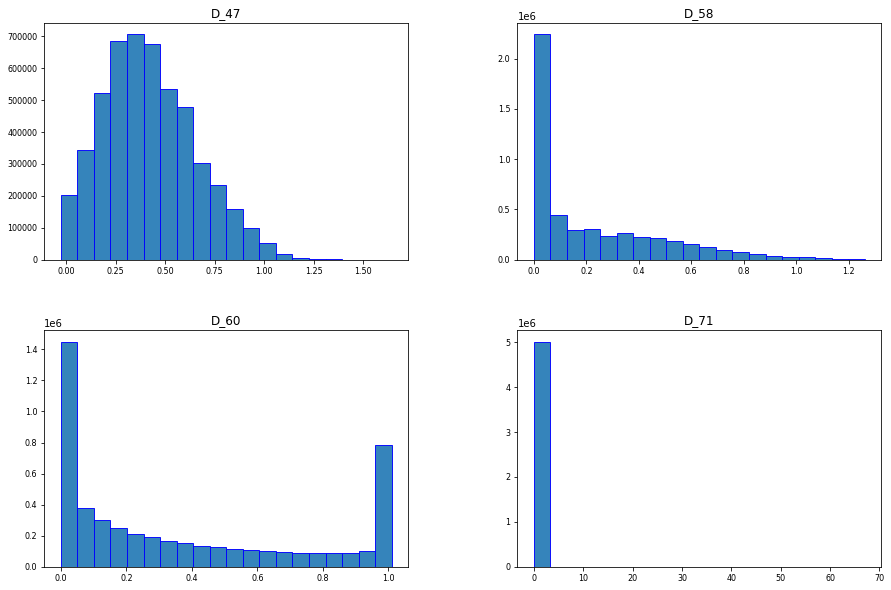

In [35]:
## features distribution
data[continuos_features].hist(figsize=(15,10), bins=20, ec="b", xlabelsize=8, ylabelsize=8, alpha=0.9, grid=False)

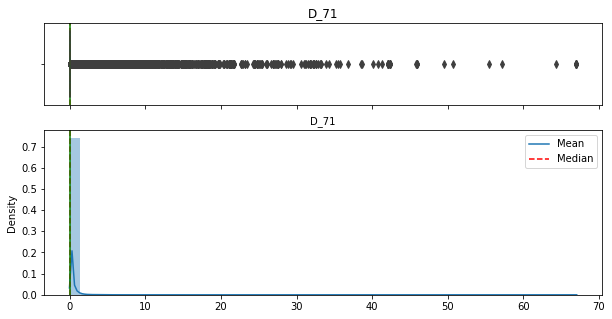

,count,mean,std,min,25%,50%,75%,max
D_71,5018442.0,0.07413,0.334416,3.026939e-09,0.008701,0.013031,0.034831,67.03231


In [36]:
column = 'D_71' 
boxhist(column, data)
min_value = np.min(data[[column]].values)
display(data[[column]].describe().T)

data type: [dtype('float32')]
total samples: 5018442 ,  num of extreme values: [0]
With limit value of limit value of  400  that represent  0.0 % the data


,count,mean,std,min,25%,50%,75%,max
D_71,5018442.0,0.07413,0.334416,3.026939e-09,0.008701,0.013031,0.034831,67.03231


With log transformation
With log transformation and  0.00010000302693936583  as a slope value


,count,mean,std,min,25%,50%,75%,max
D_71,5018442.0,-3.946721,1.338825,-9.21031,-4.732883,-4.332771,-3.354387,4.205176


9685

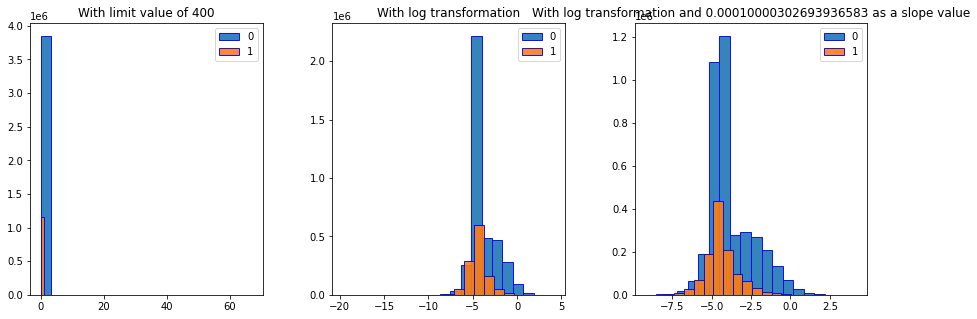

In [37]:
plot_transformations(data, column, min_value, limit_value=400, with_log_slope=True, slope=np.abs(min_value)+1e-4)
gc.collect() 


array([[<AxesSubplot:title={'center':'D_49'}>,
        <AxesSubplot:title={'center':'D_89'}>,
        <AxesSubplot:title={'center':'D_103'}>,
        <AxesSubplot:title={'center':'D_93'}>,
        <AxesSubplot:title={'center':'D_59'}>,
        <AxesSubplot:title={'center':'D_74'}>,
        <AxesSubplot:title={'center':'D_125'}>],
       [<AxesSubplot:title={'center':'D_135'}>,
        <AxesSubplot:title={'center':'D_51'}>,
        <AxesSubplot:title={'center':'D_137'}>,
        <AxesSubplot:title={'center':'D_80'}>,
        <AxesSubplot:title={'center':'D_139'}>,
        <AxesSubplot:title={'center':'D_81'}>,
        <AxesSubplot:title={'center':'D_140'}>],
       [<AxesSubplot:title={'center':'D_138'}>,
        <AxesSubplot:title={'center':'D_82'}>,
        <AxesSubplot:title={'center':'D_122'}>,
        <AxesSubplot:title={'center':'Num_Dates'}>,
        <AxesSubplot:title={'center':'D_65'}>,
        <AxesSubplot:title={'center':'D_127'}>,
        <AxesSubplot:title={'center':'D_94'}

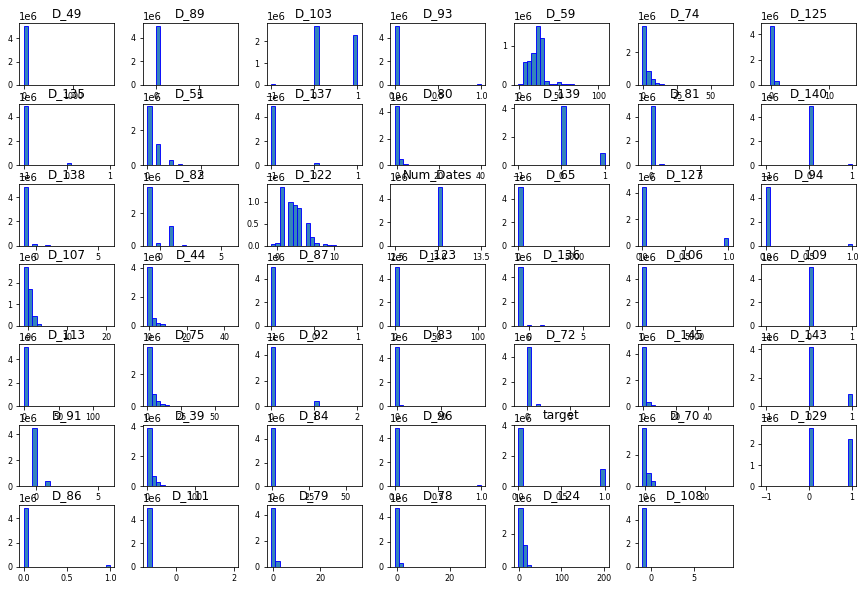

In [38]:
## features distribution
data[discrete_features].hist(figsize=(15,10), bins=20, ec="b", xlabelsize=8, ylabelsize=8, alpha=0.9, grid=False)

In [42]:
discrete_features = list(set(discrete_features) - set(['Num_Dates', 'target']))

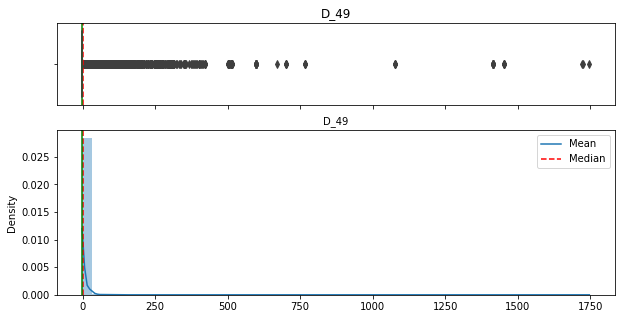

,count,mean,std,min,25%,50%,75%,max
D_49,5018442.0,0.395361,7.31745,-1.0,-1.0,-1.0,-1.0,1746.0


correlation with target 
           target      D_49
target  1.000000  0.132525
D_49    0.132525  1.000000
value counts:
 -1      4537502
 1        29262
 2        29242
 4        29094
 3        28788
         ...   
 259          1
 276          1
 294          1
 302          1
 173          1
Name: D_49, Length: 312, dtype: int64


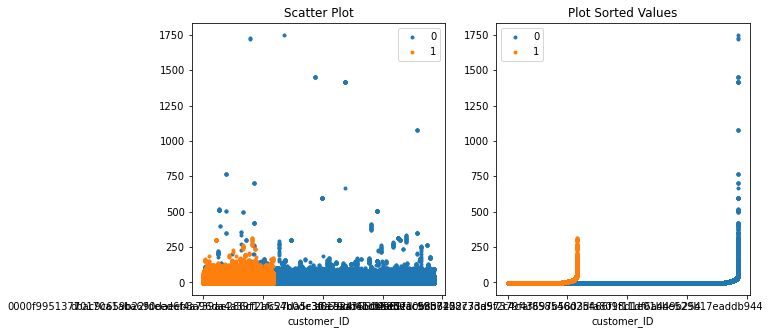

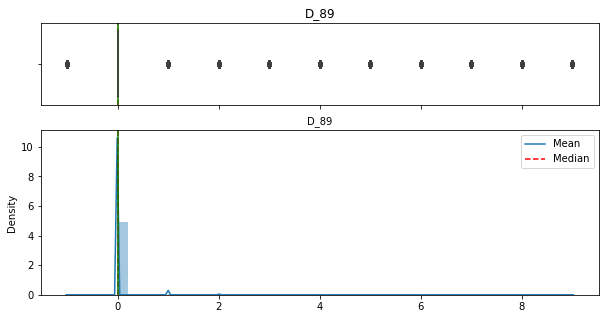

,count,mean,std,min,25%,50%,75%,max
D_89,5018442.0,0.011193,0.172887,-1.0,0.0,0.0,0.0,9.0


correlation with target 
           target      D_89
target  1.000000  0.111339
D_89    0.111339  1.000000
value counts:
  0    4965382
 1      33875
-1       8395
 2       6402
 3       2189
 4       1036
 5        507
 6        304
 9        141
 7        138
 8         73
Name: D_89, dtype: int64


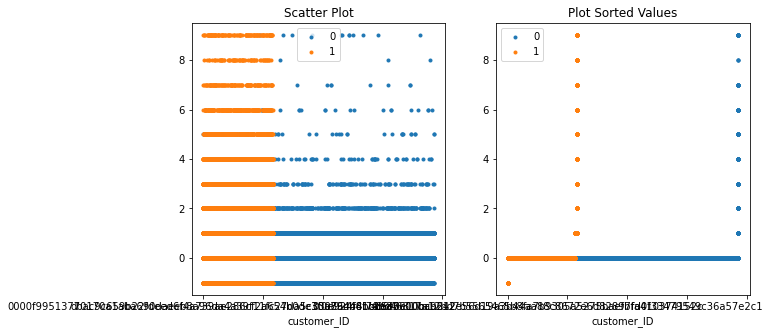

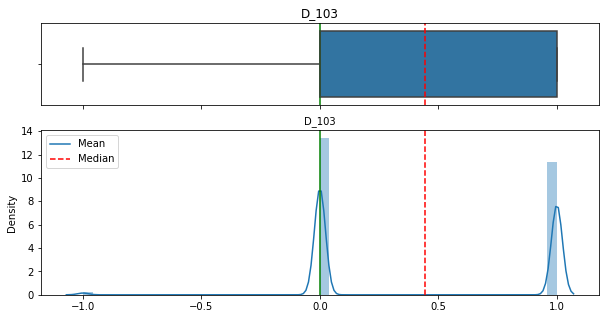

,count,mean,std,min,25%,50%,75%,max
D_103,5018442.0,0.445488,0.514509,-1.0,0.0,0.0,1.0,1.0


correlation with target 
           target     D_103
target  1.000000  0.113661
D_103   0.113661  1.000000
value counts:
  0    2694003
 1    2280048
-1      44391
Name: D_103, dtype: int64


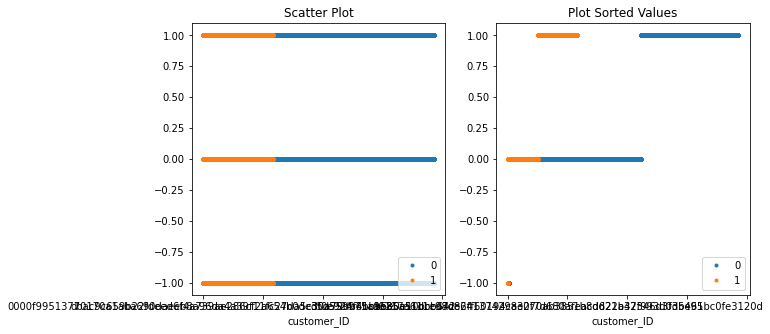

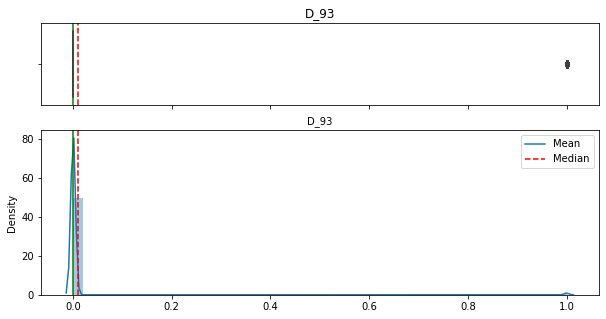

,count,mean,std,min,25%,50%,75%,max
D_93,5018442.0,0.010621,0.102511,0.0,0.0,0.0,0.0,1.0


correlation with target 
           target      D_93
target  1.000000 -0.035069
D_93   -0.035069  1.000000
value counts:
 0    4965140
1      53302
Name: D_93, dtype: int64


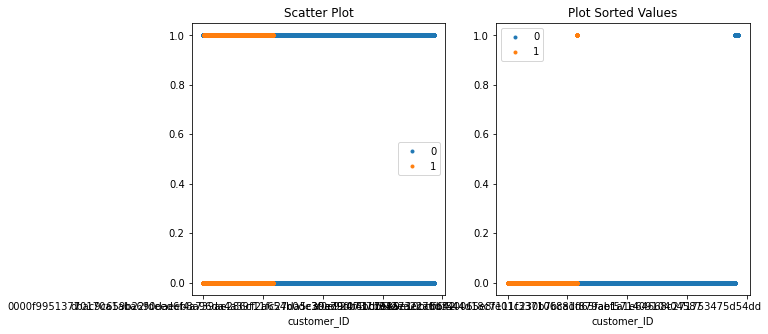

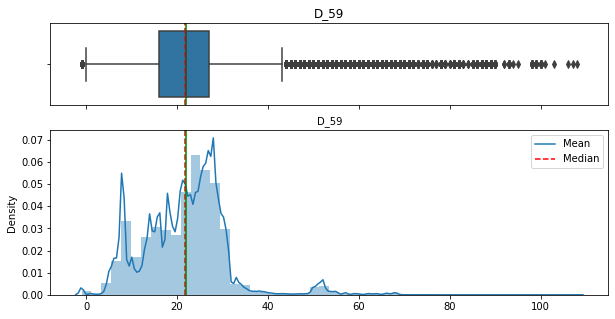

,count,mean,std,min,25%,50%,75%,max
D_59,5018442.0,21.761338,9.406281,-1.0,16.0,22.0,27.0,108.0


correlation with target 
          target     D_59
target  1.00000  0.17945
D_59    0.17945  1.00000
value counts:
 28     347948
27     317263
8      312287
26     299952
21     267901
        ...  
108         1
106         1
95          1
103         1
107         1
Name: D_59, Length: 104, dtype: int64


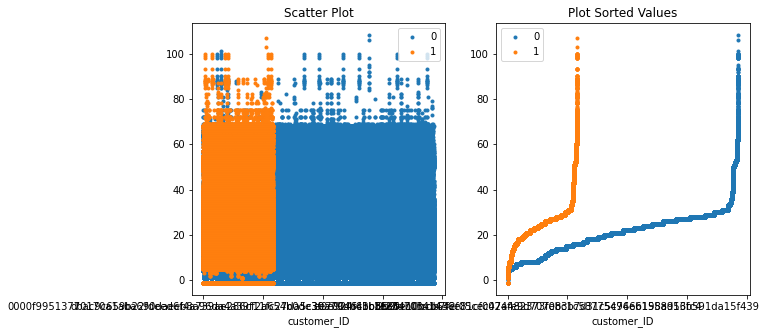

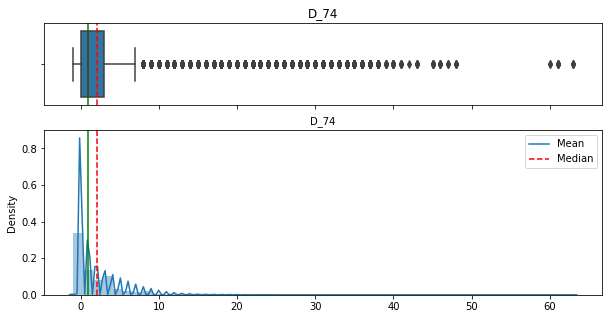

,count,mean,std,min,25%,50%,75%,max
D_74,5018442.0,2.057173,3.076993,-1.0,0.0,1.0,3.0,63.0


correlation with target 
           target      D_74
target  1.000000  0.438924
D_74    0.438924  1.000000
value counts:
  0     2162974
 1      874264
 2      535987
 3      383392
 4      277414
 5      204449
 6      150149
 7      109916
 8       79462
 9       60737
 10      44038
 11      32002
 12      23631
 13      17268
 14      12882
 15       9683
-1        7983
 16       7391
 17       5792
 18       4312
 19       3578
 20       2514
 21       1918
 22       1434
 23       1158
 24        857
 25        608
 26        557
 27        491
 28        412
 29        275
 30        189
 31        164
 33        132
 32        117
 35         74
 34         65
 36         42
 37         34
 38         22
 40         14
 45         10
 39          9
 41          7
 46          7
 61          7
 43          6
 48          5
 63          4
 47          3
 60          2
 42          1
Name: D_74, dtype: int64


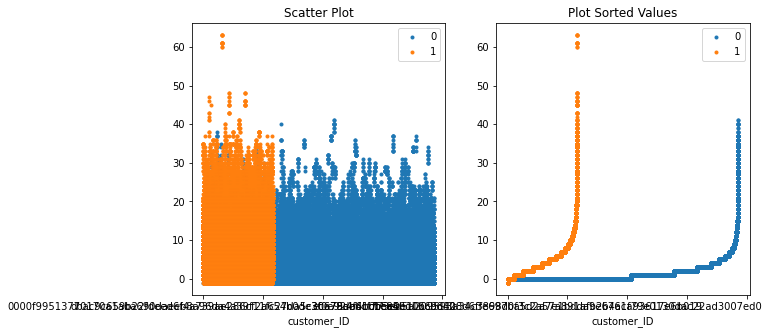

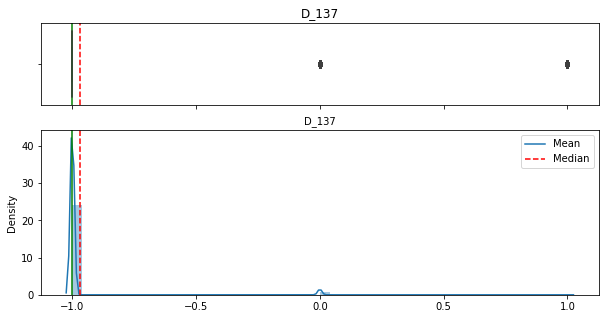

,count,mean,std,min,25%,50%,75%,max
D_137,5018442.0,-0.967546,0.178699,-1.0,-1.0,-1.0,-1.0,1.0


correlation with target 
           target     D_137
target  1.000000  0.157693
D_137   0.157693  1.000000
value counts:
 -1    4856906
 0     160201
 1       1335
Name: D_137, dtype: int64


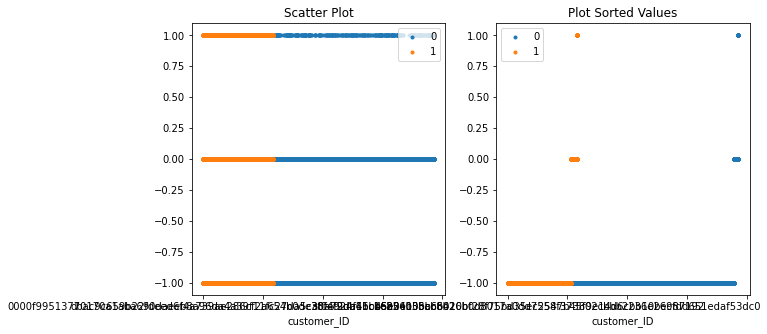

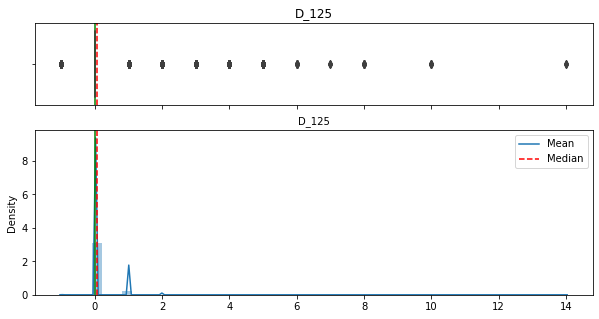

,count,mean,std,min,25%,50%,75%,max
D_125,5018442.0,0.068629,0.300345,-1.0,0.0,0.0,0.0,14.0


correlation with target 
           target     D_125
target  1.000000  0.051546
D_125   0.051546  1.000000
value counts:
  0     4628080
 1      329065
-1       36389
 2       23350
 3        1367
 4         120
 5          41
 6           9
 8           9
 10          6
 7           3
 14          3
Name: D_125, dtype: int64


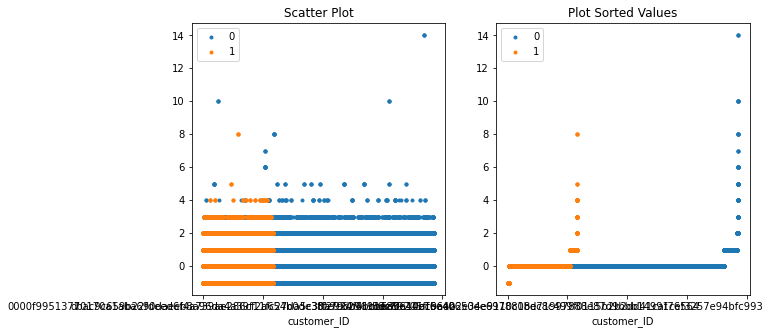

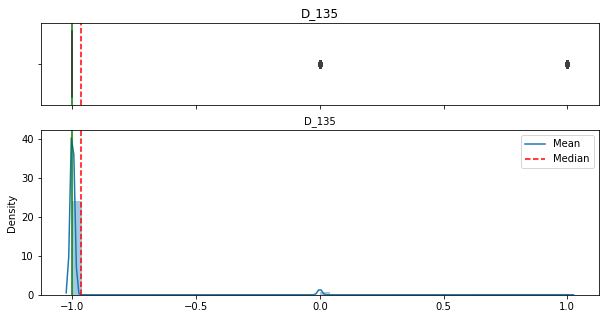

,count,mean,std,min,25%,50%,75%,max
D_135,5018442.0,-0.9671,0.182321,-1.0,-1.0,-1.0,-1.0,1.0


correlation with target 
           target     D_135
target  1.000000  0.156875
D_135   0.156875  1.000000
value counts:
 -1    4856906
 0     157965
 1       3571
Name: D_135, dtype: int64


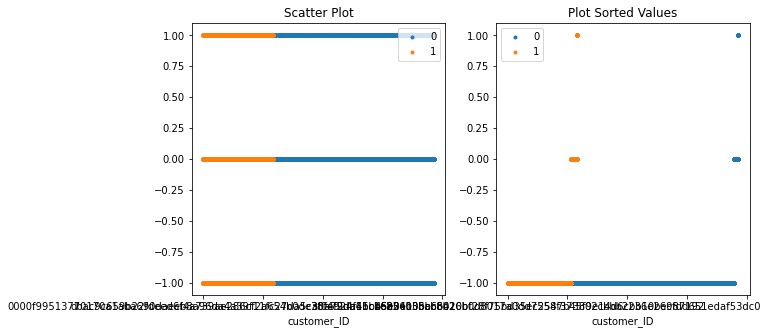

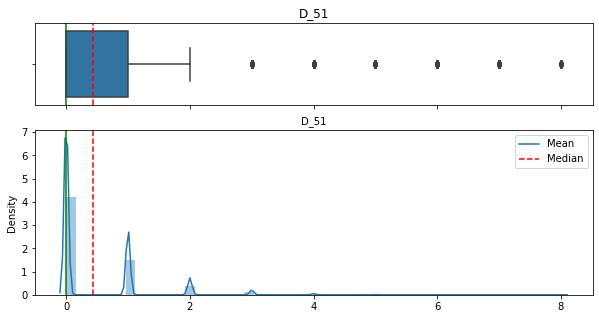

,count,mean,std,min,25%,50%,75%,max
D_51,5018442.0,0.441007,0.741261,0.0,0.0,0.0,1.0,8.0


correlation with target 
           target      D_51
target  1.000000 -0.244081
D_51   -0.244081  1.000000
value counts:
 0    3377439
1    1216376
2     310145
3      87689
4      21493
5       4500
6        654
7        129
8         17
Name: D_51, dtype: int64


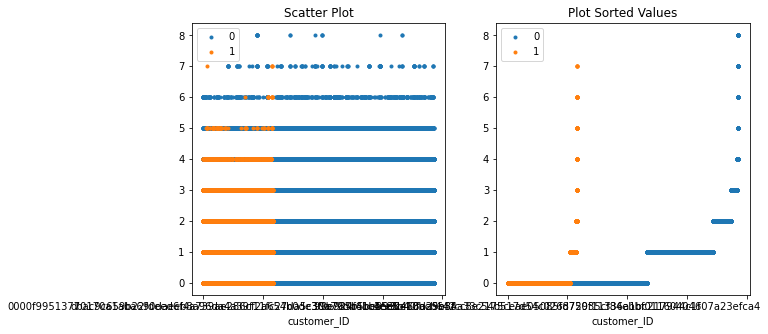

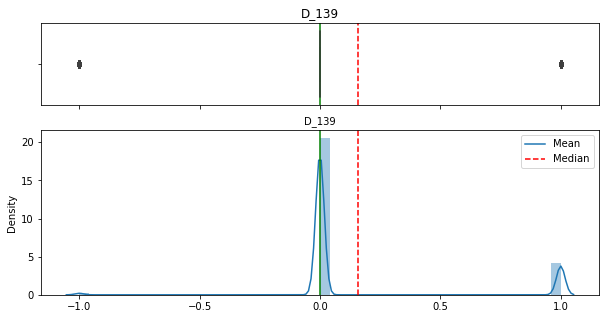

,count,mean,std,min,25%,50%,75%,max
D_139,5018442.0,0.159371,0.389439,-1.0,0.0,0.0,0.0,1.0


correlation with target 
           target     D_139
target  1.000000  0.118406
D_139   0.118406  1.000000
value counts:
  0    4129867
 1     844184
-1      44391
Name: D_139, dtype: int64


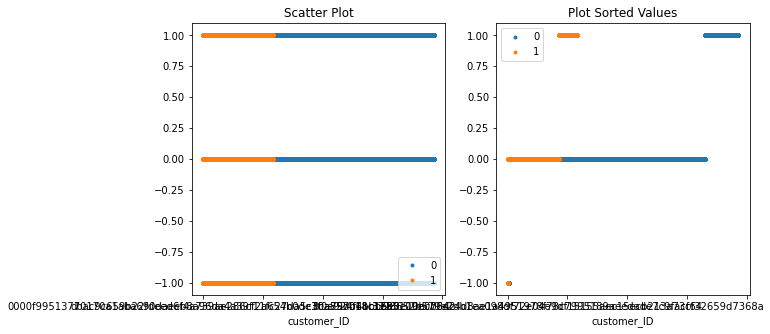

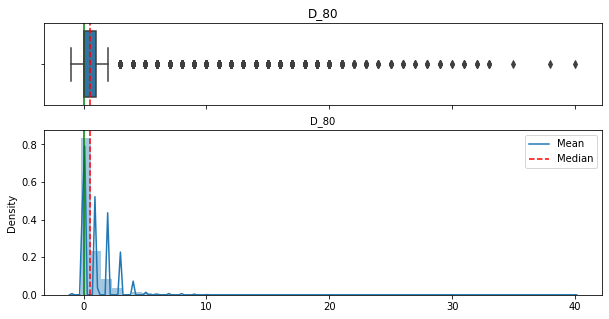

,count,mean,std,min,25%,50%,75%,max
D_80,5018442.0,0.540006,1.078585,-1.0,0.0,0.0,1.0,40.0


correlation with target 
           target      D_80
target  1.000000  0.070959
D_80    0.070959  1.000000
value counts:
  0     3435873
 1      960506
 2      348814
 3      141119
 4       62501
 5       29157
 6       14711
-1        7983
 7        7656
 8        4103
 9        2228
 10       1333
 11        827
 12        552
 13        323
 14        218
 15        134
 16        109
 17         81
 18         57
 19         49
 20         30
 21         20
 22          9
 23          9
 25          6
 24          5
 28          4
 26          4
 29          4
 27          3
 31          3
 33          3
 32          3
 30          2
 35          1
 38          1
 40          1
Name: D_80, dtype: int64


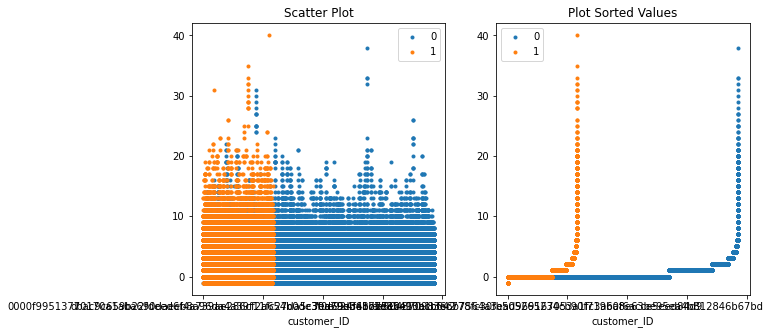

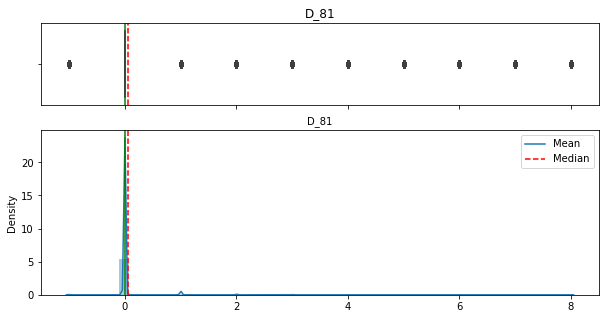

,count,mean,std,min,25%,50%,75%,max
D_81,5018442.0,0.049816,0.346229,-1.0,0.0,0.0,0.0,8.0


correlation with target 
           target      D_81
target  1.000000  0.189524
D_81    0.189524  1.000000
value counts:
  0    4844905
 1     120806
 2      24819
 3       9985
-1       6688
 4       5167
 5       2818
 6       1785
 7        933
 8        536
Name: D_81, dtype: int64


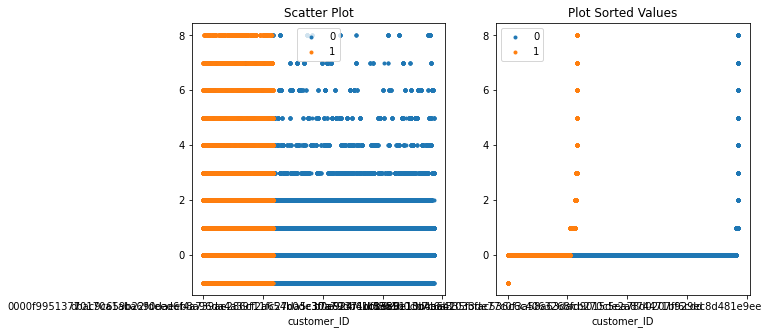

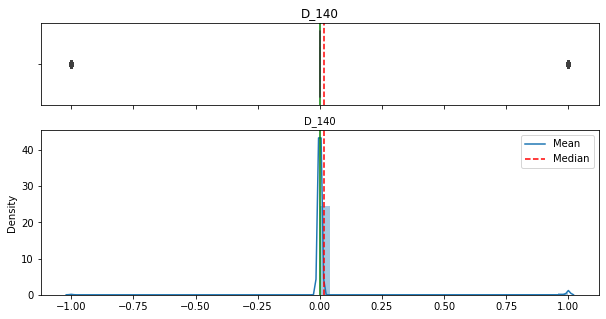

,count,mean,std,min,25%,50%,75%,max
D_140,5018442.0,0.017949,0.147638,-1.0,0.0,0.0,0.0,1.0


correlation with target 
           target     D_140
target  1.000000  0.104674
D_140   0.104674  1.000000
value counts:
  0    4907439
 1     100539
-1      10464
Name: D_140, dtype: int64


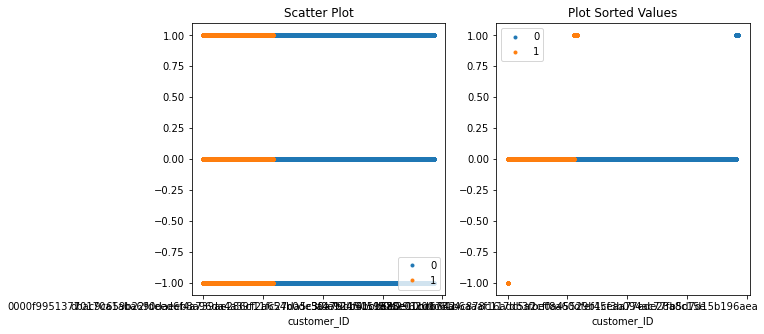

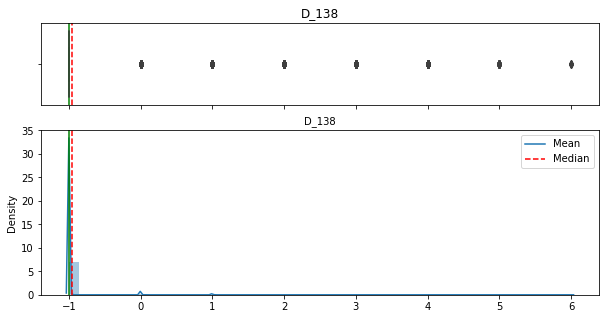

,count,mean,std,min,25%,50%,75%,max
D_138,5018442.0,-0.957428,0.25226,-1.0,-1.0,-1.0,-1.0,6.0


correlation with target 
          target    D_138
target  1.00000  0.14808
D_138   0.14808  1.00000
value counts:
 -1    4856906
 0     113982
 1      43600
 2       3466
 3        404
 4         61
 5         19
 6          4
Name: D_138, dtype: int64


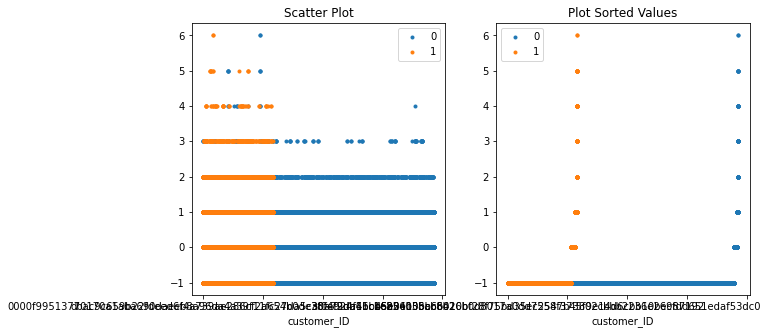

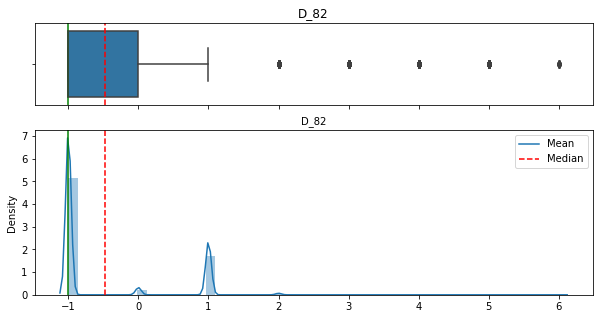

,count,mean,std,min,25%,50%,75%,max
D_82,5018442.0,-0.470601,0.877664,-1.0,-1.0,-1.0,0.0,6.0


correlation with target 
           target      D_82
target  1.000000 -0.045021
D_82   -0.045021  1.000000
value counts:
 -1    3628341
 1    1192422
 0     161728
 2      33952
 3       1749
 4        176
 5         64
 6         10
Name: D_82, dtype: int64


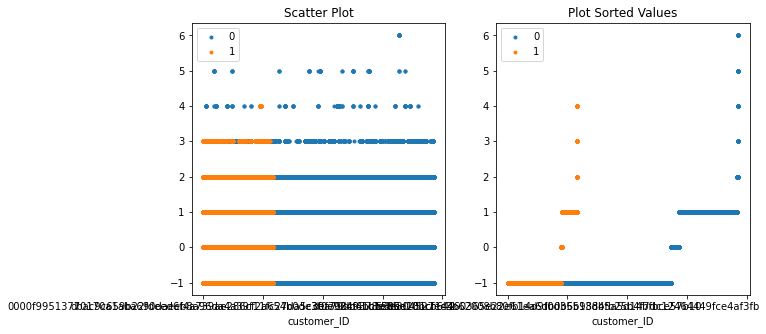

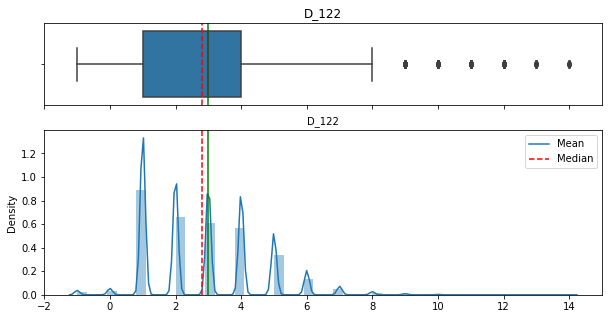

,count,mean,std,min,25%,50%,75%,max
D_122,5018442.0,2.796288,1.68399,-1.0,1.0,3.0,4.0,14.0


correlation with target 
           target     D_122
target  1.000000 -0.156461
D_122  -0.156461  1.000000
value counts:
  1     1344380
 2      995850
 3      919902
 4      849152
 5      510605
 6      200229
 7       70176
 0       52647
-1       36389
 8       25699
 9        9428
 10       3094
 11        738
 12        128
 13         15
 14         10
Name: D_122, dtype: int64


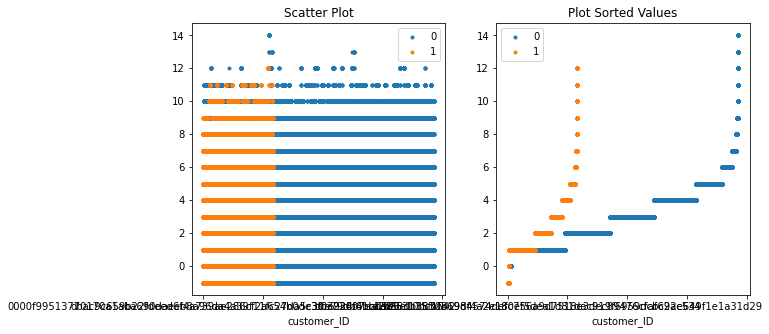

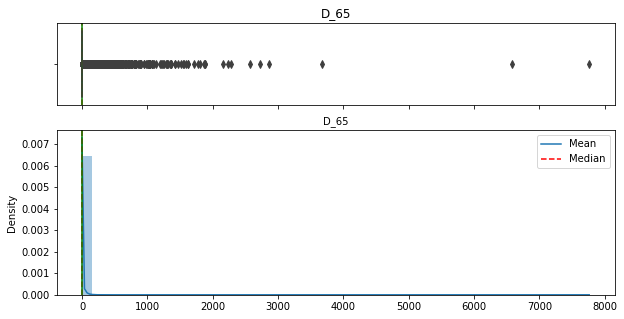

,count,mean,std,min,25%,50%,75%,max
D_65,5018442.0,1.268554,12.756749,0.0,0.0,0.0,0.0,7762.0


correlation with target 
          target     D_65
target  1.00000  0.09549
D_65    0.09549  1.00000
value counts:
 0       4805850
1         13180
2         11699
7         11217
3         10464
         ...   
789           1
1290          1
1805          1
1518          1
438           1
Name: D_65, Length: 627, dtype: int64


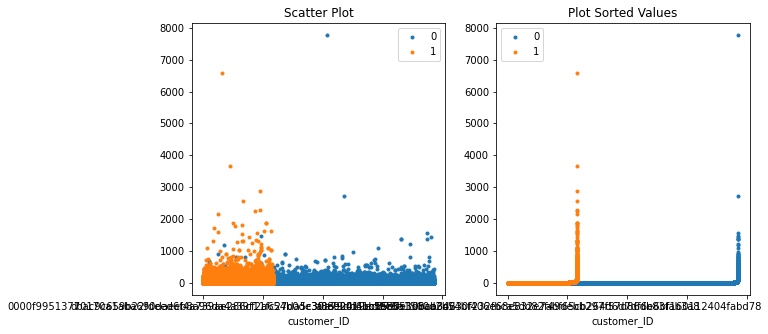

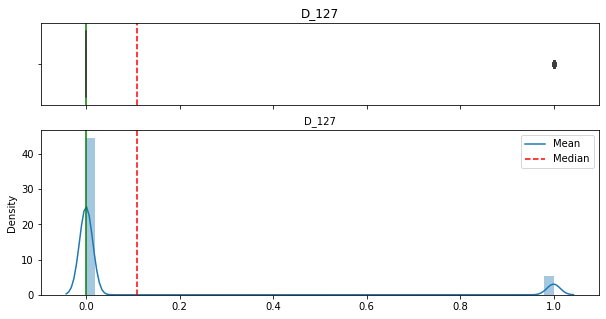

,count,mean,std,min,25%,50%,75%,max
D_127,5018442.0,0.108355,0.310828,0.0,0.0,0.0,0.0,1.0


correlation with target 
           target     D_127
target  1.000000 -0.178034
D_127  -0.178034  1.000000
value counts:
 0    4474671
1     543771
Name: D_127, dtype: int64


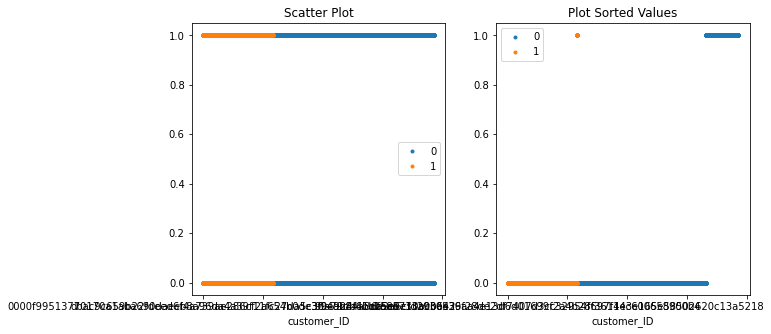

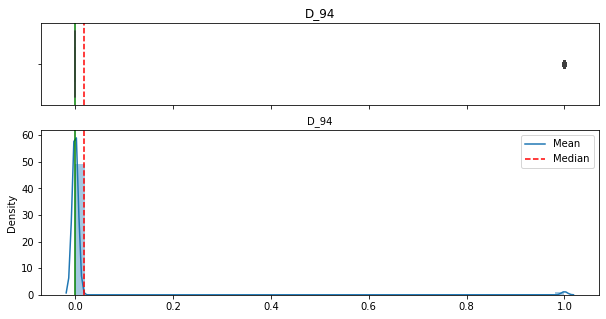

,count,mean,std,min,25%,50%,75%,max
D_94,5018442.0,0.018355,0.134231,0.0,0.0,0.0,0.0,1.0


correlation with target 
           target      D_94
target  1.000000 -0.067618
D_94   -0.067618  1.000000
value counts:
 0    4926329
1      92113
Name: D_94, dtype: int64


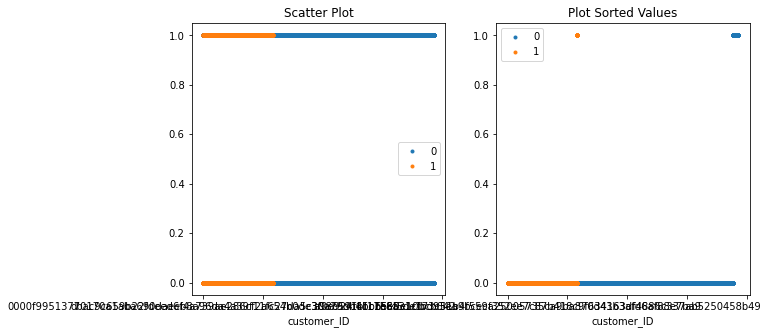

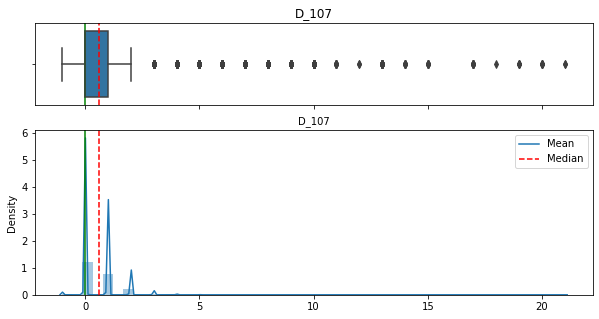

,count,mean,std,min,25%,50%,75%,max
D_107,5018442.0,0.585951,0.780778,-1.0,0.0,0.0,1.0,21.0


correlation with target 
           target     D_107
target  1.000000  0.115432
D_107   0.115432  1.000000
value counts:
  0     2694003
 1     1705269
 2      471303
 3       84001
-1       44391
 4       15045
 5        3120
 6         764
 7         307
 8          88
 10         42
 9          30
 13         24
 17         11
 11         10
 14          9
 15          9
 20          6
 19          5
 12          2
 21          2
 18          1
Name: D_107, dtype: int64


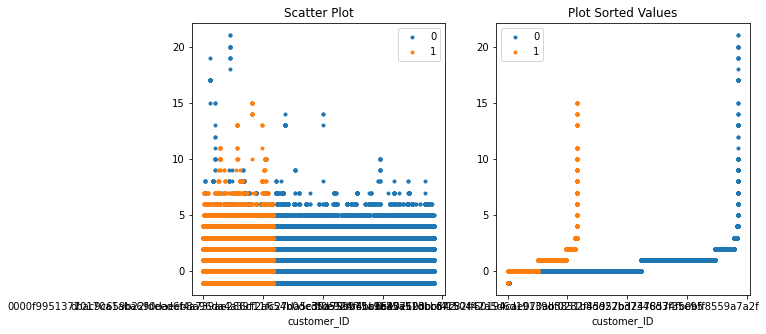

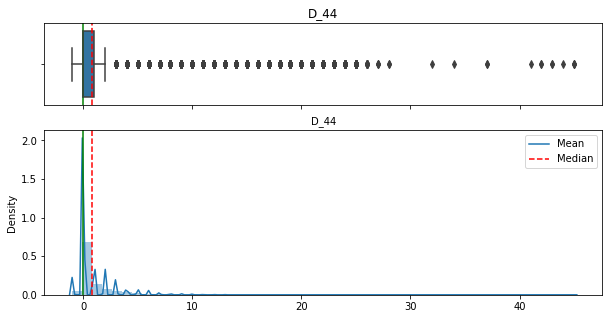

,count,mean,std,min,25%,50%,75%,max
D_44,5018442.0,0.800858,1.77067,-1.0,0.0,0.0,1.0,45.0


correlation with target 
           target      D_44
target  1.000000  0.462151
D_44    0.462151  1.000000
value counts:
  0     3171741
 1      650900
 2      355951
-1      230786
 3      221463
 4      142227
 5       90097
 6       57495
 7       35460
 8       22877
 9       14439
 10       9099
 11       5678
 12       3519
 13       2151
 14       1457
 15       1031
 16        686
 17        406
 18        311
 19        250
 20        132
 21         75
 22         69
 23         53
 25         33
 24         28
 26         10
 27          3
 45          3
 28          2
 42          2
 43          2
 37          2
 44          1
 41          1
 34          1
 32          1
Name: D_44, dtype: int64


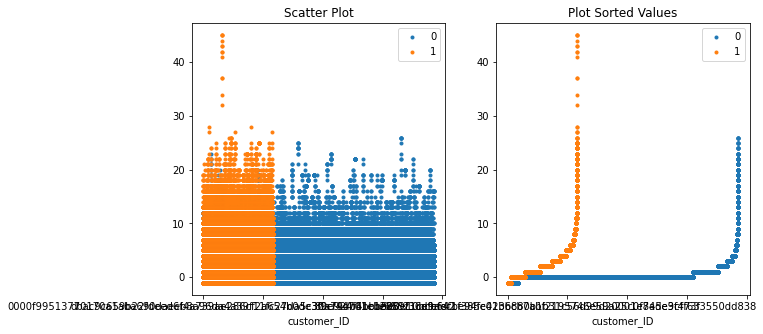

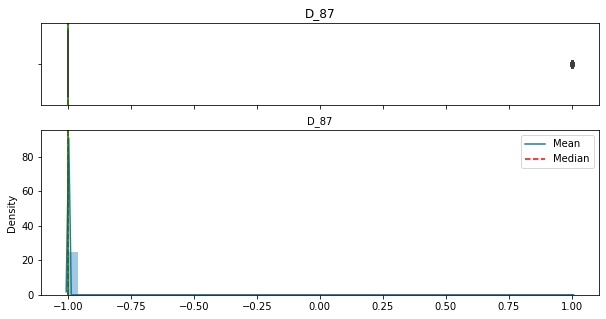

,count,mean,std,min,25%,50%,75%,max
D_87,5018442.0,-0.998513,0.054505,-1.0,-1.0,-1.0,-1.0,1.0


correlation with target 
           target      D_87
target  1.000000  0.041074
D_87    0.041074  1.000000
value counts:
 -1    5014712
 1       3730
Name: D_87, dtype: int64


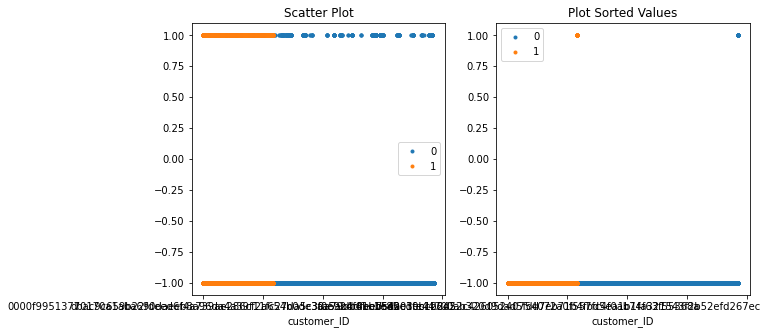

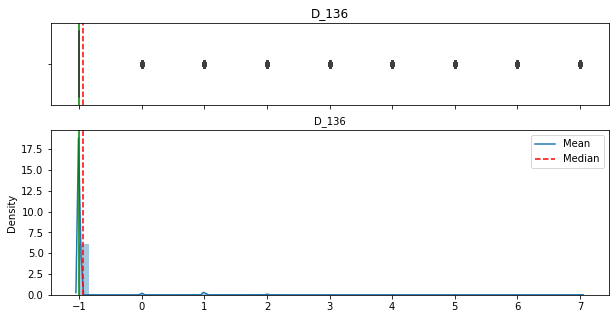

,count,mean,std,min,25%,50%,75%,max
D_136,5018442.0,-0.937713,0.372641,-1.0,-1.0,-1.0,-1.0,7.0


correlation with target 
           target     D_136
target  1.000000  0.149556
D_136   0.149556  1.000000
value counts:
 -1    4856906
 1      94517
 0      44199
 2      16060
 3       4187
 4       1483
 5        684
 6        343
 7         63
Name: D_136, dtype: int64


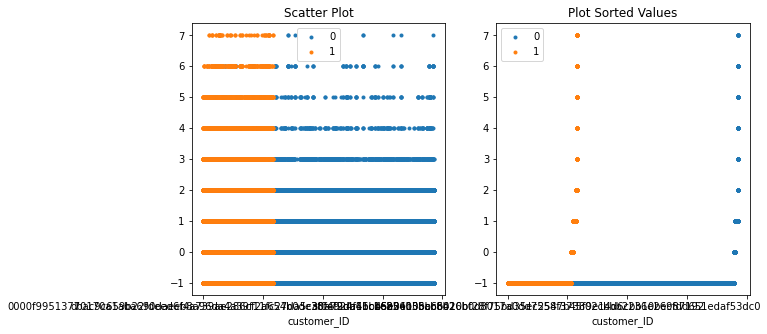

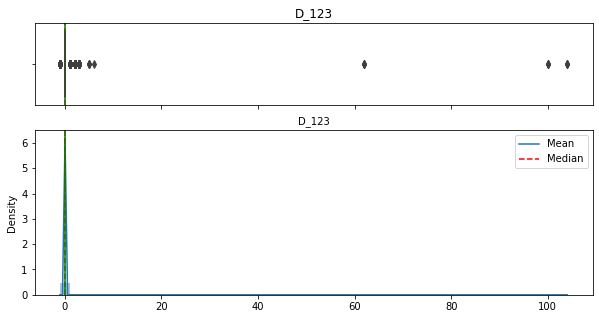

,count,mean,std,min,25%,50%,75%,max
D_123,5018442.0,0.036034,0.253982,-1.0,0.0,0.0,0.0,104.0


correlation with target 
           target     D_123
target  1.000000  0.036639
D_123   0.036639  1.000000
value counts:
  0      4767286
 1       213135
-1        36389
 2         1589
 3           30
 5            3
 104          3
 100          3
 62           3
 6            1
Name: D_123, dtype: int64


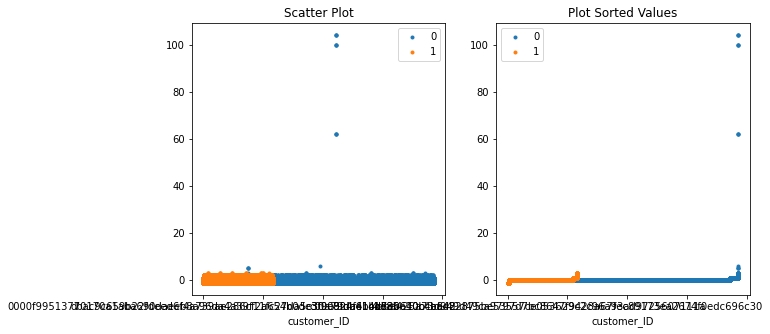

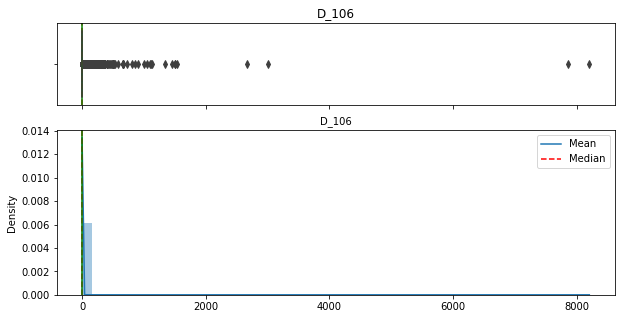

,count,mean,std,min,25%,50%,75%,max
D_106,5018442.0,-0.459734,6.553132,-1.0,-1.0,-1.0,-1.0,8203.0


correlation with target 
           target     D_106
target  1.000000  0.056449
D_106   0.056449  1.000000
value counts:
 -1      4541163
 0        72684
 2        71139
 3        63022
 1        52305
         ...   
 228          1
 585          1
 134          1
 188          1
 360          1
Name: D_106, Length: 303, dtype: int64


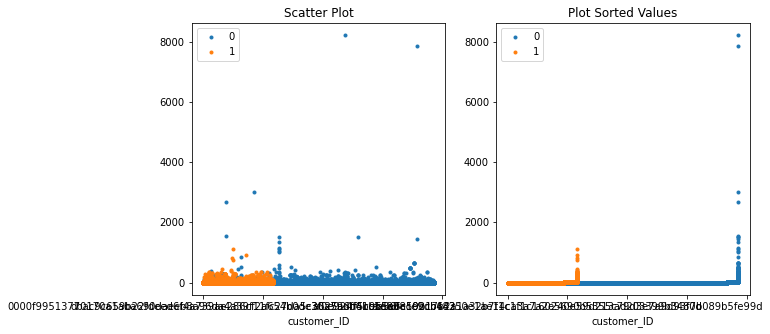

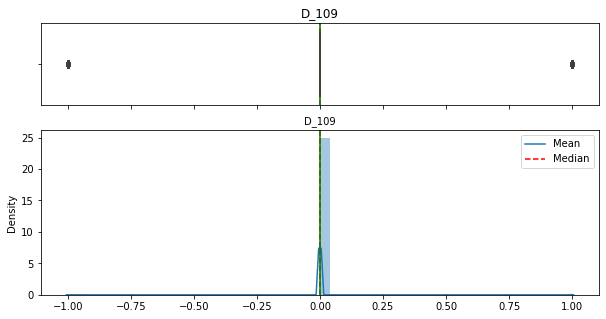

,count,mean,std,min,25%,50%,75%,max
D_109,5018442.0,0.001612,0.043,-1.0,0.0,0.0,0.0,1.0


correlation with target 
           target     D_109
target  1.000000 -0.018732
D_109  -0.018732  1.000000
value counts:
  0    5009150
 1       8690
-1        602
Name: D_109, dtype: int64


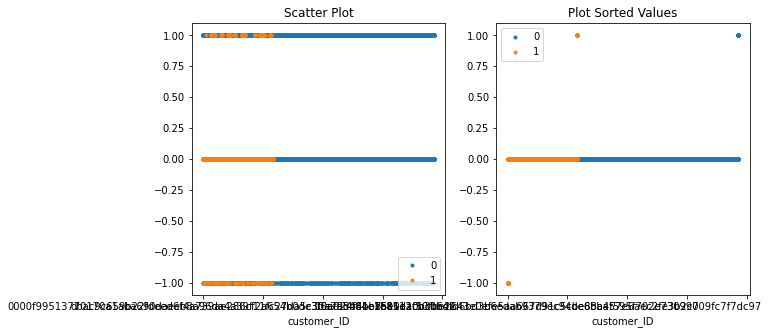

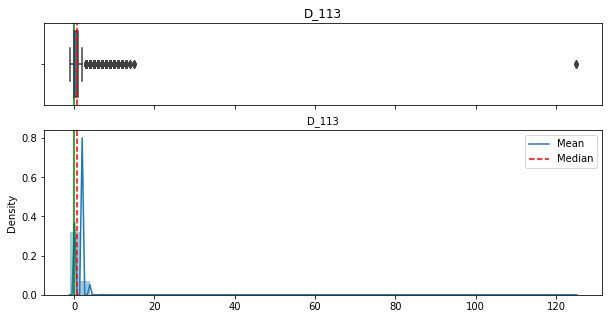

,count,mean,std,min,25%,50%,75%,max
D_113,5018442.0,0.727704,1.126291,-1.0,0.0,0.0,1.0,125.0


correlation with target 
           target     D_113
target  1.000000  0.145703
D_113   0.145703  1.000000
value counts:
  0      2905794
 1      1112946
 2       556039
 3       249966
 4       101371
 5        36867
-1        36389
 6        13161
 7         3967
 8         1296
 9          478
 10          92
 12          34
 11          18
 13          15
 125          3
 14           3
 15           3
Name: D_113, dtype: int64


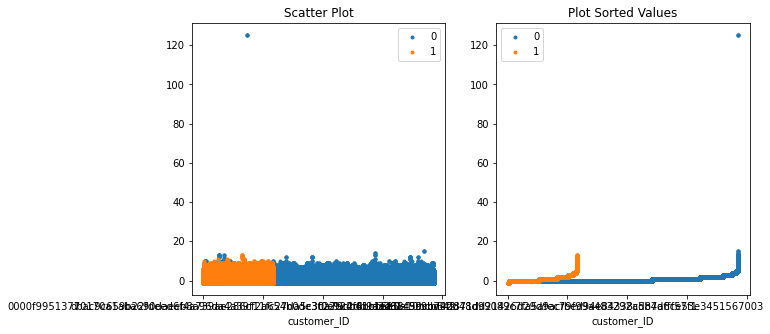

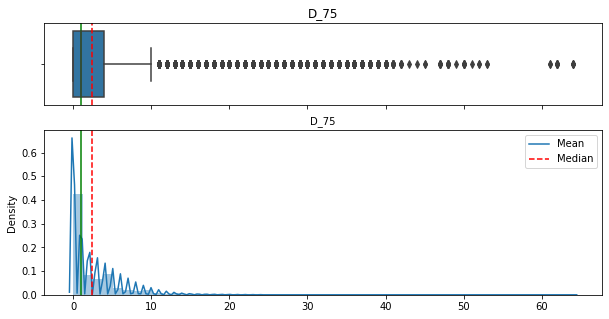

,count,mean,std,min,25%,50%,75%,max
D_75,5018442.0,2.477695,3.380006,0.0,0.0,1.0,4.0,64.0


correlation with target 
           target      D_75
target  1.000000  0.476023
D_75    0.476023  1.000000
value counts:
 0     1906394
1      824711
2      546118
3      422199
4      325868
5      249142
6      186582
7      141223
8      105938
9       77650
10      59302
11      43703
12      32147
13      23730
14      17506
15      13050
16       9997
17       7590
18       5849
19       4392
20       3705
21       2560
22       1994
23       1506
24       1286
25        894
26        667
27        560
28        526
29        415
30        287
31        192
32        175
34        112
33        112
35         95
36         67
37         52
39         30
38         27
40         24
41         13
48         10
62          7
50          7
42          6
47          6
64          4
61          2
45          2
52          2
53          2
43          1
49          1
44          1
51          1
Name: D_75, dtype: int64


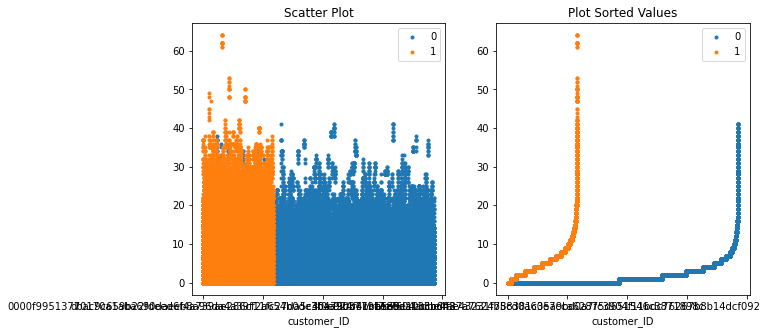

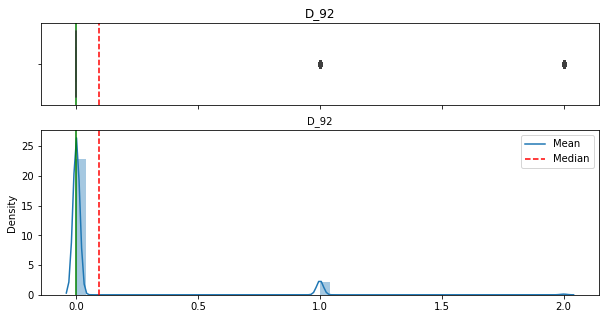

,count,mean,std,min,25%,50%,75%,max
D_92,5018442.0,0.091336,0.301531,0.0,0.0,0.0,0.0,2.0


correlation with target 
          target     D_92
target  1.00000 -0.14485
D_92   -0.14485  1.00000
value counts:
 0    4579970
1     418581
2      19891
Name: D_92, dtype: int64


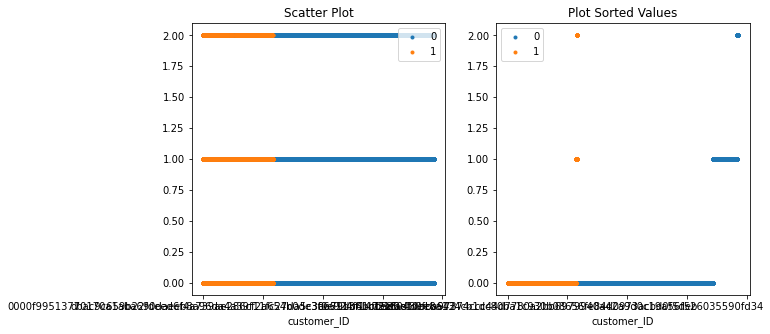

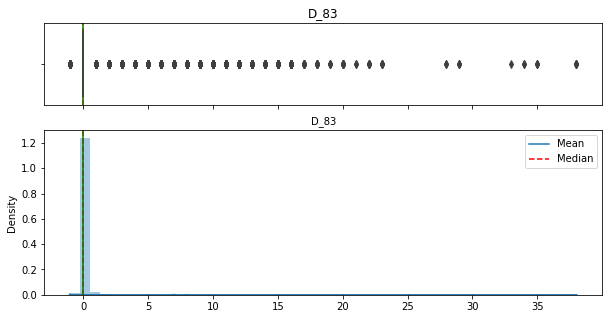

,count,mean,std,min,25%,50%,75%,max
D_83,5018442.0,0.021529,0.308471,-1.0,0.0,0.0,0.0,38.0


correlation with target 
           target      D_83
target  1.000000  0.054893
D_83    0.054893  1.000000
value counts:
  0     4853753
 1       78346
-1       56003
 2       19351
 3        5685
 4        2526
 5        1053
 6         606
 7         451
 8         189
 10         97
 9          84
 12         83
 11         37
 15         33
 16         29
 14         26
 13         25
 20         11
 17         11
 18         10
 22          6
 38          5
 23          5
 19          4
 35          3
 29          3
 21          2
 34          2
 28          2
 33          1
Name: D_83, dtype: int64


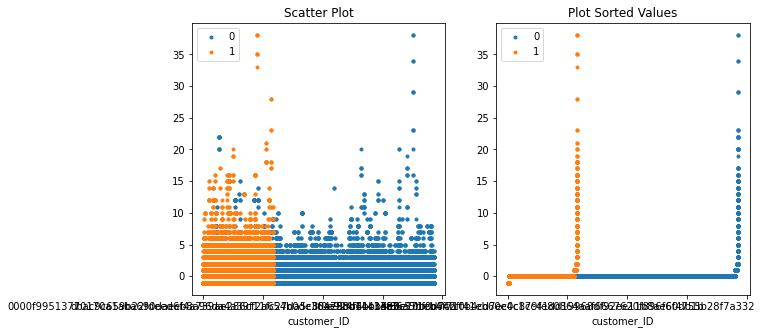

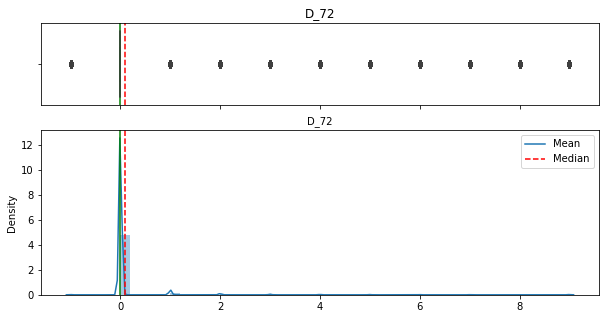

,count,mean,std,min,25%,50%,75%,max
D_72,5018442.0,0.095352,0.612675,-1.0,0.0,0.0,0.0,9.0


correlation with target 
           target      D_72
target  1.000000  0.189073
D_72    0.189073  1.000000
value counts:
  0    4781850
 1     141321
 2      37733
 3      16337
 4       9856
 9       7982
 5       6368
-1       5894
 6       4881
 7       3534
 8       2686
Name: D_72, dtype: int64


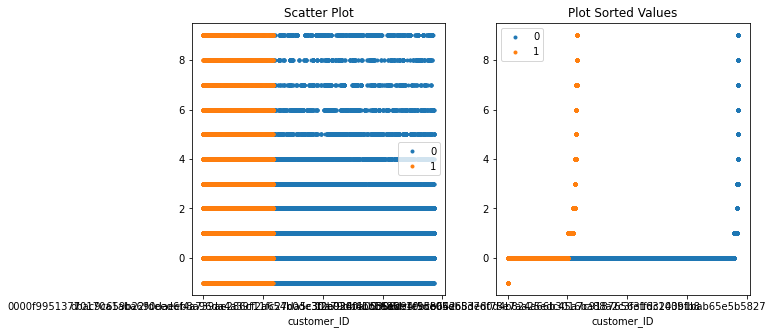

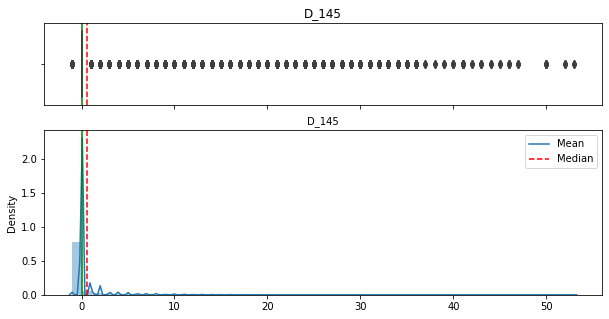

,count,mean,std,min,25%,50%,75%,max
D_145,5018442.0,0.594695,2.083534,-1.0,0.0,0.0,0.0,53.0


correlation with target 
           target     D_145
target  1.000000  0.115619
D_145   0.115619  1.000000
value counts:
  0     4129867
 1      334092
 2      159333
 3       73746
 4       64395
-1       44391
 5       41291
 6       36062
 7       25152
 8       23255
 9       16388
 10      15562
 11      11091
 12       9642
 13       6979
 14       5650
 15       4745
 16       3820
 17       2937
 18       2073
 19       1765
 20       1253
 21       1090
 22        865
 23        677
 24        388
 26        355
 25        293
 27        270
 29        211
 28        149
 31        128
 30        118
 35         84
 32         76
 34         52
 33         46
 36         25
 41         21
 50         12
 46         11
 40         11
 43         10
 39          9
 47          8
 52          8
 44          8
 45          7
 42          7
 53          5
 37          5
 38          4
Name: D_145, dtype: int64


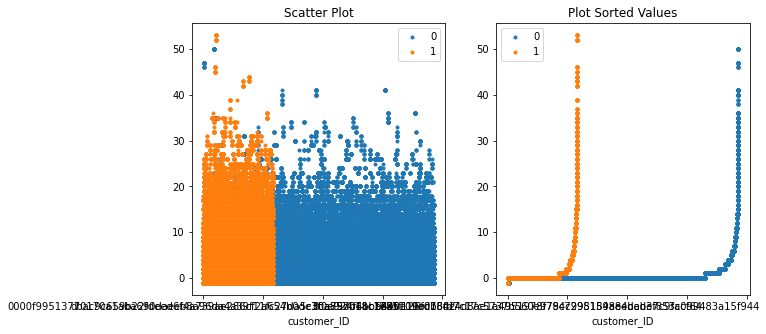

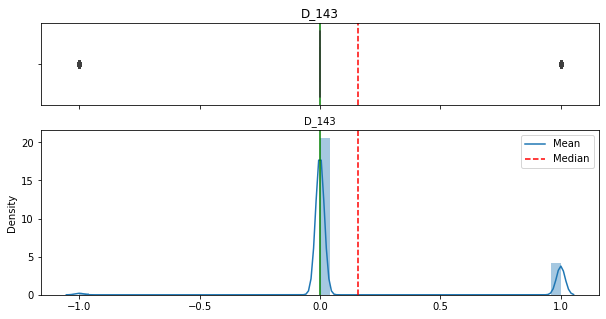

,count,mean,std,min,25%,50%,75%,max
D_143,5018442.0,0.159239,0.389324,-1.0,0.0,0.0,0.0,1.0


correlation with target 
           target     D_143
target  1.000000  0.118422
D_143   0.118422  1.000000
value counts:
  0    4130526
 1     843525
-1      44391
Name: D_143, dtype: int64


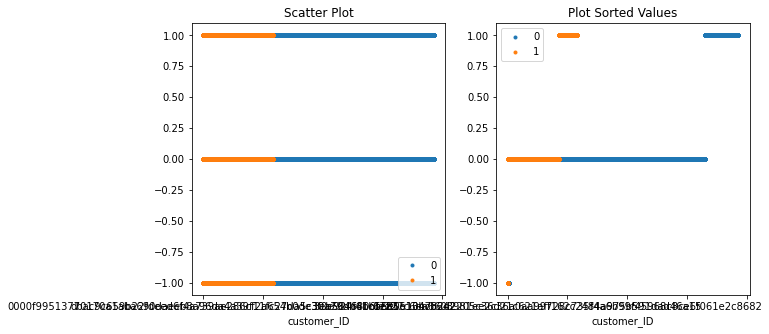

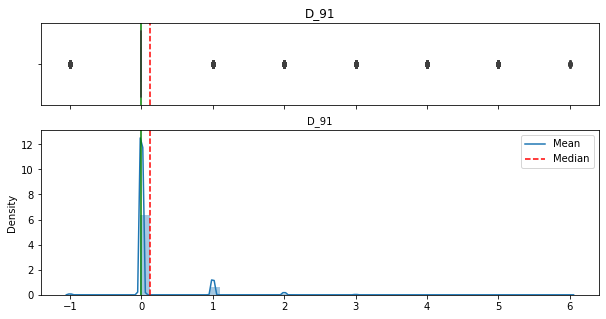

,count,mean,std,min,25%,50%,75%,max
D_91,5018442.0,0.112673,0.38508,-1.0,0.0,0.0,0.0,6.0


correlation with target 
           target      D_91
target  1.000000 -0.125342
D_91   -0.125342  1.000000
value counts:
  0    4491337
 1     430515
 2      63177
-1      23264
 3       8903
 4       1113
 5        121
 6         12
Name: D_91, dtype: int64


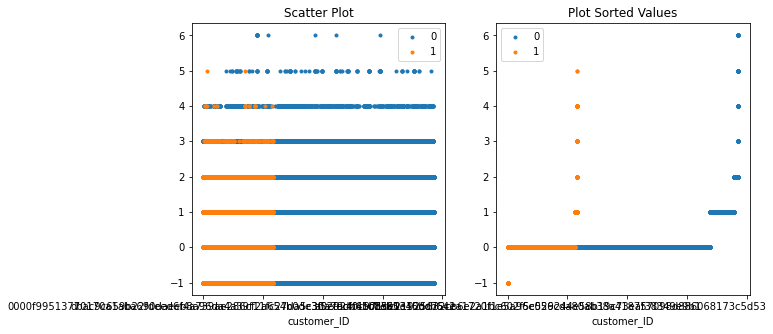

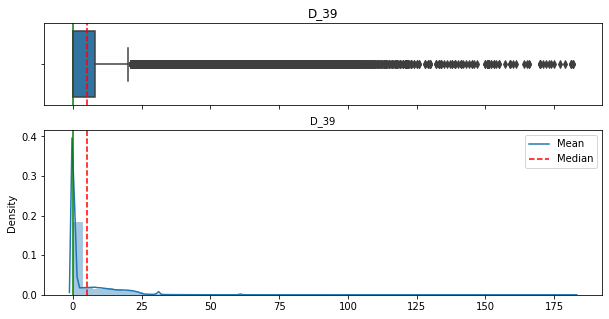

,count,mean,std,min,25%,50%,75%,max
D_39,5018442.0,5.062495,9.077143,0.0,0.0,0.0,8.0,182.0


correlation with target 
           target      D_39
target  1.000000  0.186321
D_39    0.186321  1.000000
value counts:
 0      2766691
1       415981
3        94769
2        92983
4        92652
        ...   
136          1
172          1
146          1
142          1
174          1
Name: D_39, Length: 169, dtype: int64


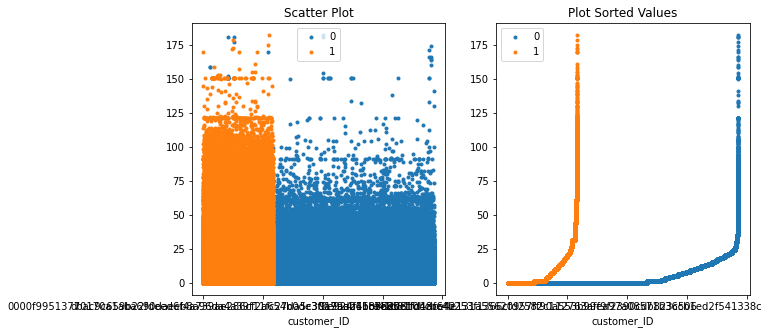

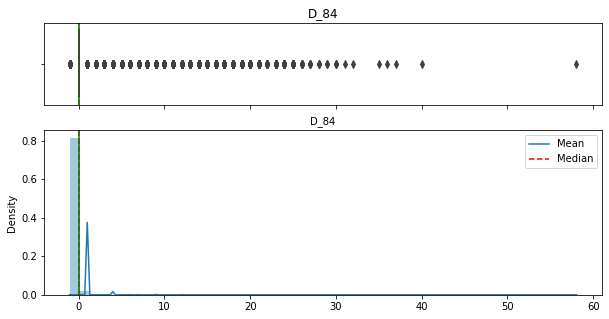

,count,mean,std,min,25%,50%,75%,max
D_84,5018442.0,0.076616,0.569989,-1.0,0.0,0.0,0.0,58.0


correlation with target 
           target      D_84
target  1.000000  0.195305
D_84    0.195305  1.000000
value counts:
  0     4814008
 1      123941
 2       32540
 3       14216
 4        8444
-1        8395
 5        4954
 6        3524
 7        2390
 8        1715
 9        1174
 10        849
 11        587
 12        403
 13        384
 14        218
 15        165
 16        129
 17        119
 18         68
 20         48
 19         47
 21         24
 23         20
 24         18
 25         18
 22         15
 26          9
 27          5
 30          3
 28          3
 29          2
 36          1
 40          1
 35          1
 58          1
 37          1
 31          1
 32          1
Name: D_84, dtype: int64


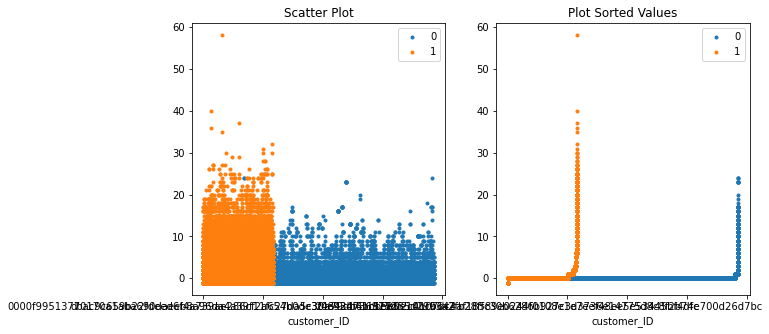

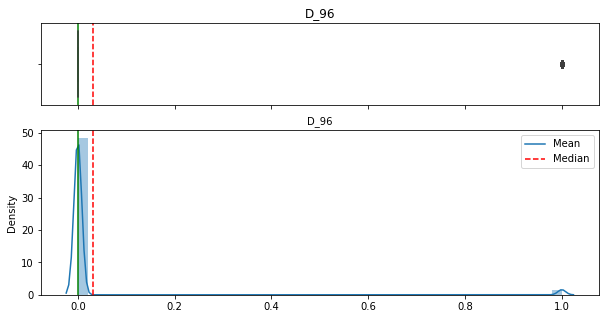

,count,mean,std,min,25%,50%,75%,max
D_96,5018442.0,0.031998,0.175994,0.0,0.0,0.0,0.0,1.0


correlation with target 
           target      D_96
target  1.000000 -0.057536
D_96   -0.057536  1.000000
value counts:
 0    4857863
1     160579
Name: D_96, dtype: int64


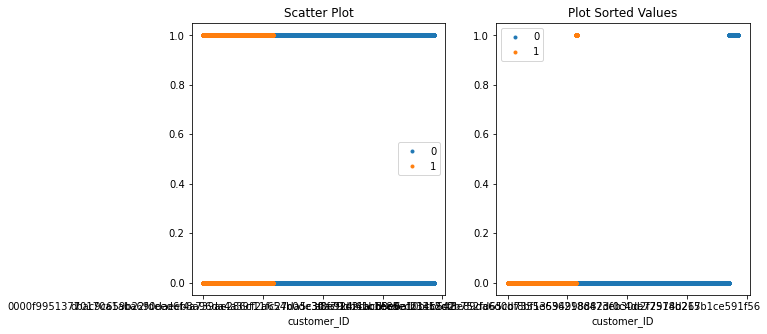

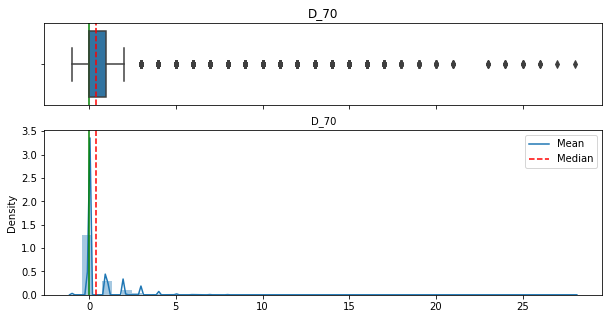

,count,mean,std,min,25%,50%,75%,max
D_70,5018442.0,0.413823,0.912741,-1.0,0.0,0.0,1.0,28.0


correlation with target 
           target      D_70
target  1.000000  0.312308
D_70    0.312308  1.000000
value counts:
  0     3694975
 1      854102
 2      270916
 3      100901
 4       41713
 5       18641
-1       18225
 6        9273
 7        4444
 8        2294
 9        1259
 10        687
 11        411
 12        217
 13        138
 14         81
 16         39
 15         38
 17         25
 18         16
 19         14
 20          9
 25          5
 24          5
 21          5
 23          4
 26          3
 27          1
 28          1
Name: D_70, dtype: int64


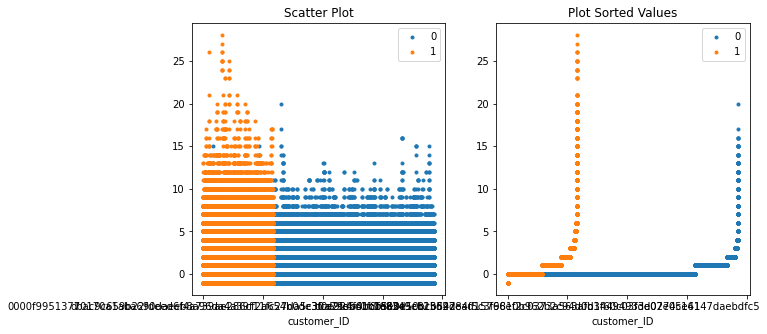

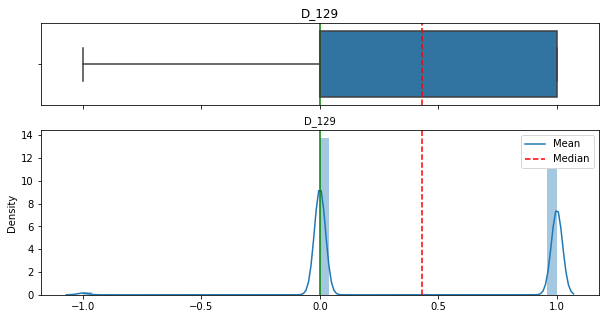

,count,mean,std,min,25%,50%,75%,max
D_129,5018442.0,0.43208,0.512911,-1.0,0.0,0.0,1.0,1.0


correlation with target 
           target     D_129
target  1.000000 -0.126904
D_129  -0.126904  1.000000
value counts:
  0    2761290
 1    2212761
-1      44391
Name: D_129, dtype: int64


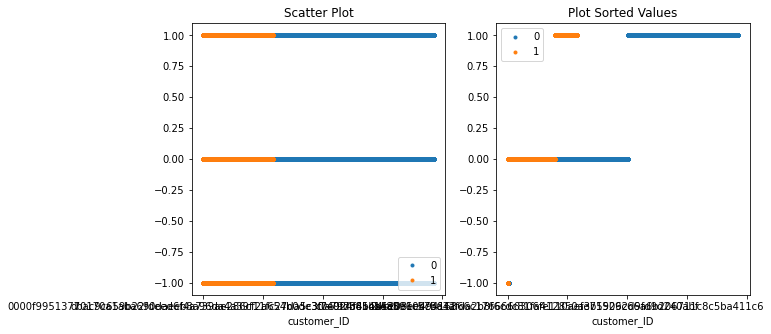

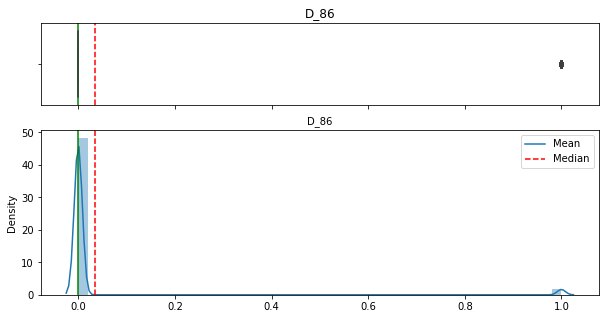

,count,mean,std,min,25%,50%,75%,max
D_86,5018442.0,0.034439,0.182353,0.0,0.0,0.0,0.0,1.0


correlation with target 
          target     D_86
target  1.00000 -0.06433
D_86   -0.06433  1.00000
value counts:
 0    4845613
1     172829
Name: D_86, dtype: int64


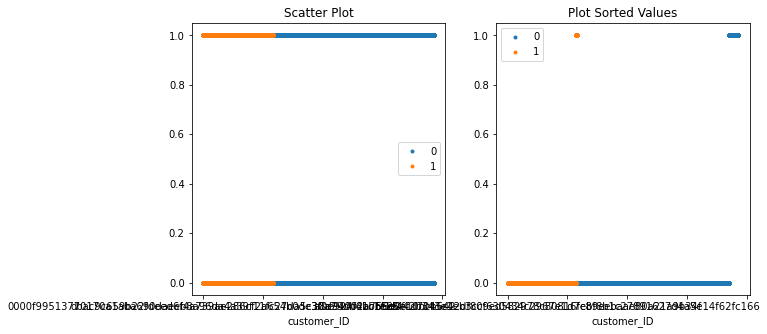

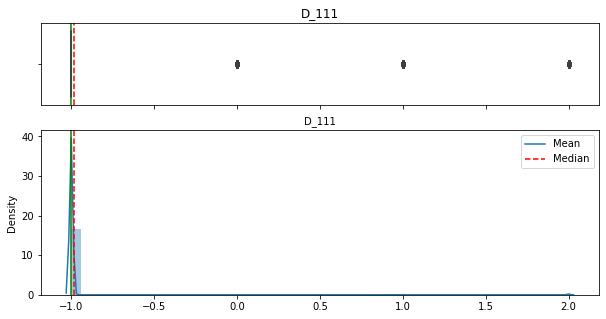

,count,mean,std,min,25%,50%,75%,max
D_111,5018442.0,-0.983171,0.218191,-1.0,-1.0,-1.0,-1.0,2.0


correlation with target 
           target     D_111
target  1.000000  0.061896
D_111   0.061896  1.000000
value counts:
 -1    4987619
 2      24307
 1       5019
 0       1497
Name: D_111, dtype: int64


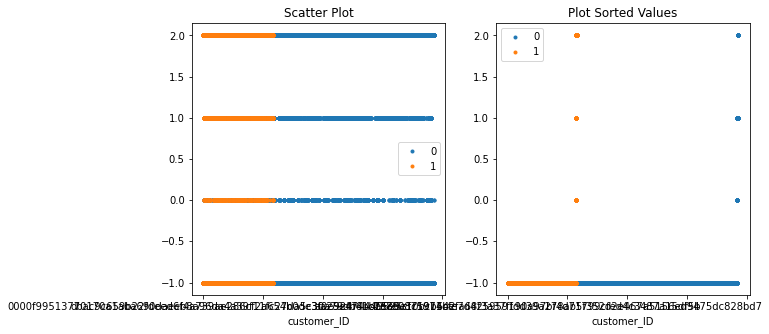

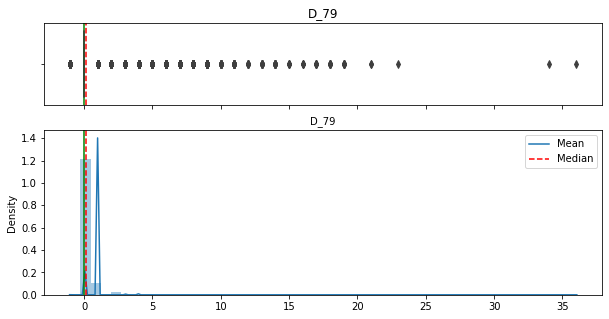

,count,mean,std,min,25%,50%,75%,max
D_79,5018442.0,0.11852,0.436247,-1.0,0.0,0.0,0.0,36.0


correlation with target 
           target      D_79
target  1.000000  0.218552
D_79    0.218552  1.000000
value counts:
  0     4516395
 1      380758
 2       76748
-1       21107
 3       16847
 4        4351
 5        1272
 6         472
 7         172
 8         117
 9          95
 11         21
 10         19
 14         14
 13         11
 12          8
 18          8
 19          7
 17          6
 15          5
 16          4
 21          2
 36          1
 23          1
 34          1
Name: D_79, dtype: int64


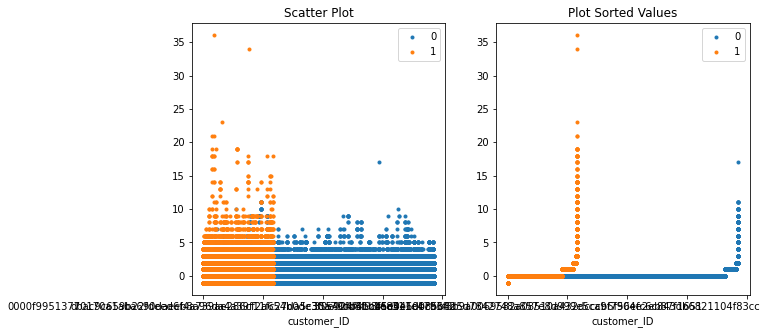

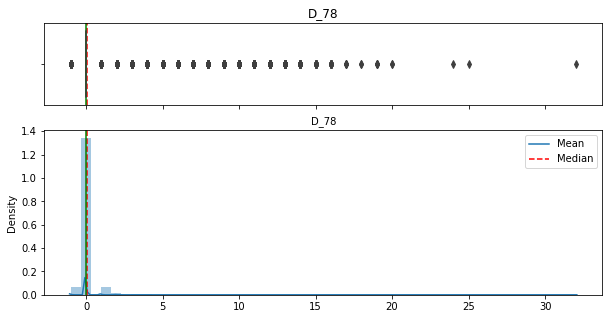

,count,mean,std,min,25%,50%,75%,max
D_78,5018442.0,0.060664,0.553669,-1.0,0.0,0.0,0.0,32.0


correlation with target 
           target      D_78
target  1.000000  0.248265
D_78    0.248265  1.000000
value counts:
  0     4449304
 1      233683
-1      230786
 2       59645
 3       23242
 4       10516
 5        5187
 6        2670
 7        1475
 8         823
 9         468
 10        270
 11        151
 12         85
 13         59
 14         26
 15         19
 16         18
 19          4
 17          4
 20          2
 18          2
 32          1
 25          1
 24          1
Name: D_78, dtype: int64


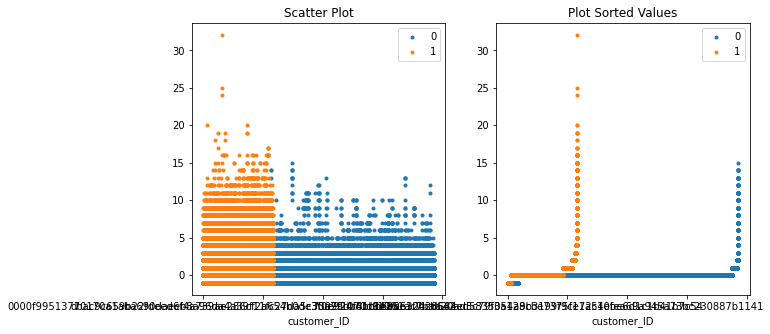

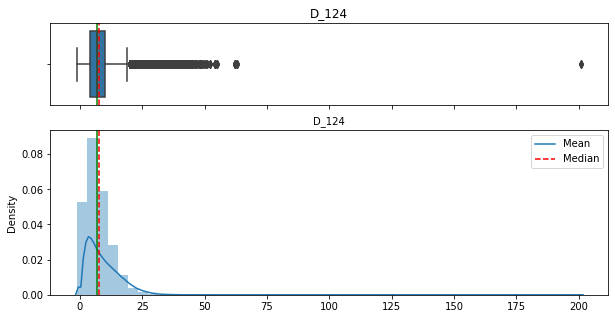

,count,mean,std,min,25%,50%,75%,max
D_124,5018442.0,7.545068,4.971431,-1.0,4.0,7.0,10.0,201.0


correlation with target 
           target     D_124
target  1.000000  0.049347
D_124   0.049347  1.000000
value counts:
  5      476852
 4      472673
 6      447872
 3      440348
 7      411892
 8      370472
 2      349634
 9      323110
 10     276815
 11     230691
 1      212868
 12     192432
 13     157329
 14     126696
 15     101986
 16      81036
 17      62419
 18      50087
 19      38559
-1       36389
 0       29921
 20      29686
 21      22963
 22      17607
 23      13047
 24      10501
 25       7980
 26       6219
 27       4861
 28       3567
 29       2640
 30       2245
 31       1579
 32       1210
 33        883
 34        720
 35        625
 36        484
 37        378
 38        274
 39        252
 40        113
 41        113
 44         97
 42         97
 45         61
 43         38
 48         29
 46         17
 49         16
 50         12
 47         11
 54         10
 62         10
 52          4
 55          3
 201         3
 51          3
 63     

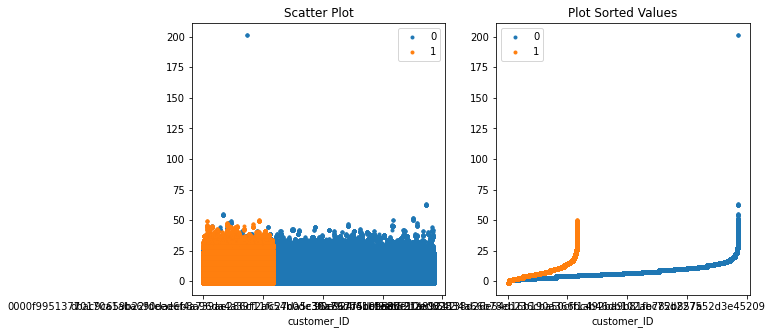

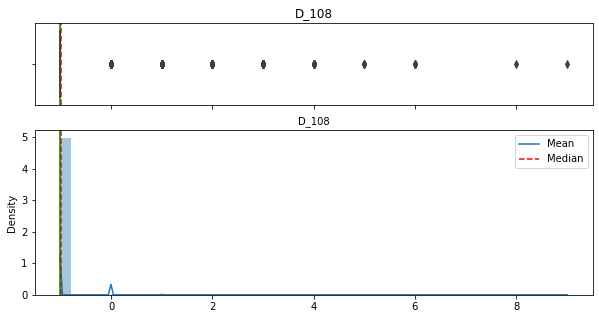

,count,mean,std,min,25%,50%,75%,max
D_108,5018442.0,-0.99487,0.076488,-1.0,-1.0,-1.0,-1.0,9.0


correlation with target 
           target     D_108
target  1.000000  0.028584
D_108   0.028584  1.000000
value counts:
 -1    4994156
 0      23074
 1       1052
 2        117
 3         21
 4         12
 5          4
 6          4
 9          1
 8          1
Name: D_108, dtype: int64


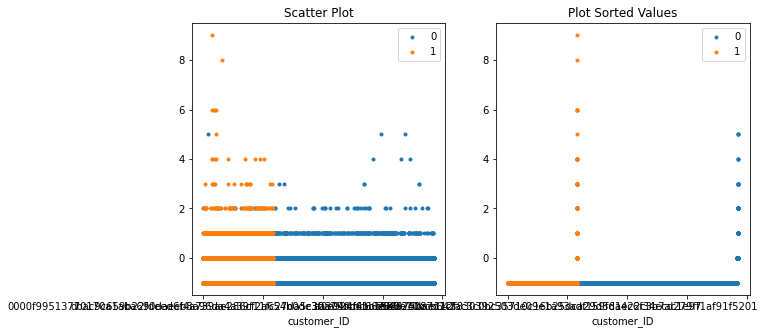

In [43]:
for column in discrete_features:
    boxhist(column, data)
    display(data[[column]].describe().T)
    plot_discrete_data(data, column)
    gc.collect()